# INTRODUCTION TO NLP

In [2]:
# SESSION 1 AND 2

In [ ]:
# pip install spacy
# import spacy
# from spacy.lang.en.examples import sentences
# pip install en_core_web_sm
# !python -m spacy download en_core_web_sm

In [59]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#  creating a new instance of a blank English language model
nlp=spacy.load('en_core_web_sm')

In [61]:
type(nlp)

spacy.lang.en.English

In [62]:
# creates a structured document object
doc1=nlp('India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a supportive Government. A huge population, mostly comprising the youth, is a strong driver for demand and an ample source of manpower.')

In [63]:
type(doc1)

spacy.tokens.doc.Doc

## CREATE A DATAFRAME:

In [458]:
text_s=nlp('We calculate the similarities between documents using the sim object and print the resulting similarity matrix. In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter. For example, setting num_best=1 will return the document with the highest similarity score.')

In [472]:
import pandas as pd

# Initialize an empty list to store the sentences
sentences = []

# Loop over each sentence in the document
for i, sent in enumerate(text_s.sents):
    # Append the sentence number and sentence text to the list
    sentences.append({'Sentence Number': i+1, 'Sentence Text': sent.text})

# Convert the list to a pandas DataFrame
sent_df = pd.DataFrame(sentences)

# Print the resulting DataFrame
print(sent_df)


   Sentence Number                                      Sentence Text
0                1  We calculate the similarities between document...
1                2  In this case, the output will be a 4x4 matrix,...
2                3  Note that MatrixSimilarity can be used with ot...
3                4  For example, setting num_best=1 will return th...


In [ ]:
## OR ###

In [459]:
type(text_s)

spacy.tokens.doc.Doc

In [475]:
doc_list = list(nlp.pipe([text_s]))
for doc1 in doc_list:
    for sentence in doc1.sents:
        print(sentence.text)

We calculate the similarities between documents using the sim object and print the resulting similarity matrix.
In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.
Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter.
For example, setting num_best=1 will return the document with the highest similarity score.


In [476]:
# converting doc into a DF of sentences
# Create a list of sentences from the doc
sentences = [sent.text for sent in doc1.sents]

# Create a dictionary with the sentences as values and their indices as keys
data = {'sentence': sentences}

# Convert the dictionary to a pandas DataFrame
sent_df = pd.DataFrame.from_dict(data, orient='columns')

# Print the resulting DataFrame
print(sent_df)

token = []
pos = []
new_sent_df = sent_df
for sent in nlp.pipe(new_sent_df['sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
        pos.append([word.pos_ for word in sent])
        
print(token)
print(pos)

new_sent_df['Token']=token
new_sent_df['POS']=pos

new_sent_df


data = new_sent_df['sentence']

                                            sentence
0  We calculate the similarities between document...
1  In this case, the output will be a 4x4 matrix,...
2  Note that MatrixSimilarity can be used with ot...
3  For example, setting num_best=1 will return th...
[['We', 'calculate', 'the', 'similarities', 'between', 'documents', 'using', 'the', 'sim', 'object', 'and', 'print', 'the', 'resulting', 'similarity', 'matrix', '.'], ['In', 'this', 'case', ',', 'the', 'output', 'will', 'be', 'a', '4x4', 'matrix', ',', 'where', 'each', 'element', 'represents', 'the', 'cosine', 'similarity', 'between', 'two', 'documents', '.'], ['Note', 'that', 'MatrixSimilarity', 'can', 'be', 'used', 'with', 'other', 'similarity', 'measures', 'besides', 'cosine', 'similarity', 'by', 'specifying', 'a', 'different', 'num_best', 'parameter', '.'], ['For', 'example', ',', 'setting', 'num_best=1', 'will', 'return', 'the', 'document', 'with', 'the', 'highest', 'similarity', 'score', '.']]
[['PRON', 'VERB', 'DET', '

In [477]:
data

0    We calculate the similarities between document...
1    In this case, the output will be a 4x4 matrix,...
2    Note that MatrixSimilarity can be used with ot...
3    For example, setting num_best=1 will return th...
Name: sentence, dtype: object

In [ ]:
############

### TOKENIZATION

Tokenization is a fundamental task in natural language processing that involves splitting text into individual words or tokens. We tokenize text in order to make it easier to process and analyze, since we can then treat each token as a separate unit of meaning.

In summary, tokenization is a key preprocessing step in many natural language processing tasks that involves breaking down text into smaller, more manageable units. By doing so, we can more easily analyze and manipulate text, and prepare it for further processing and analysis.

In [64]:
for token in doc1:
    print(token)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

### Number of tokens

In [65]:
# Count the number of tokens

t_count=0
for token in doc1:
    t_count=t_count+1
    print(token)
print('The no of tokens:',t_count)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

In [66]:
len(doc1)

201

In [67]:
doc1[0]

India

In [68]:
doc1[:-1]

India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a 

### STOP WORDS

In [69]:
# STOP WORDS:
from spacy.lang.en.stop_words import STOP_WORDS

In [70]:
print(STOP_WORDS)

{'how', 'so', 'hundred', 'a', 'on', 'has', "'d", 'else', 'seem', 'are', 'becoming', 'formerly', 'now', 'anyhow', 'name', 'eight', 'which', 'namely', 'noone', 'although', 'anyone', 'these', 'the', 'nowhere', 'thru', '‘re', 'she', 'because', 'your', 'into', 'unless', "n't", 'last', 'does', 'empty', 'nothing', 'before', 'four', 'us', 'together', 'still', 'hence', 'beyond', '‘ve', '’d', 'that', 'show', 'this', 'behind', 'too', '’ve', 'them', 'might', 'give', 'just', 're', 'became', 'becomes', 'quite', 'everywhere', 'n’t', 'meanwhile', 'myself', 'twelve', 'could', 'somehow', 'put', 'herein', 'go', 'off', 'all', 'indeed', 'between', 'do', 'few', 'keep', 'above', 'towards', 'whither', 'can', 'seemed', 'you', 'become', 'only', 'forty', 'along', 'than', 'more', 'one', 'below', 'whom', 'whole', 'seems', 'with', 'side', 'since', 'moreover', 'where', 'besides', 'their', 'those', 'may', 'former', 'no', 'latter', 'yourselves', 'during', 'anything', 'or', 'will', 'sometime', 'whether', 'ever', 'whenc

In [71]:
len(STOP_WORDS)

326

### Is it a stop word?

In [72]:
# Is it a stop word
for token in doc1:
    print(token,'==>',token.is_stop)

India ==> False
, ==> False
a ==> True
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> True
the ==> True
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> True
area ==> False
, ==> False
the ==> True
second ==> False
- ==> False
most ==> True
populous ==> False
country ==> False
with ==> True
over ==> True
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> False
democracy ==> False
in ==> True
the ==> True
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> True
an ==> True
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> True
people ==> False
. ==> False
The ==> True
country ==> False
holds ==> False
its ==> True
uniqueness ==> False
in ==> True
its ==> True
diversity ==> False
, ==> False
and ==> True
hence ==> True
h

In [104]:
# Find the no of stop words tokens in the doc1

stop_count=0
for token in doc1:
    if token.is_stop==True:
        print(token)
        stop_count=stop_count+1
print('The count of non-stop word tokens:',stop_count)

a
is
the
by
the
most
with
over
and
the
most
in
the
of
an
and
The
its
in
its
and
hence
has
itself
to
with
and
While
the
has
to
in
it
with
since
in
the
have
been
and
in
and
have
up
and
as
their
on
one
while
the
and
are
up
in
a
on
the
other
Thus
the
is
many
for
to
the
of
a
of
and
a
A
mostly
the
is
a
for
and
an
of
The count of non-stop word tokens: 80


In [105]:
# Count the no of non-stop words
s_count=0
for token in doc1:
    print(token,'==>',token.is_stop)
print('\n\n The non-stop words:\n')
for token in doc1:
    if token.is_stop==False:
        s_count=s_count+1
        print(token)
print('\n The count of non-stop words:',s_count)

India ==> False
, ==> False
a ==> True
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> True
the ==> True
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> True
area ==> False
, ==> False
the ==> True
second ==> False
- ==> False
most ==> True
populous ==> False
country ==> False
with ==> True
over ==> True
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> False
democracy ==> False
in ==> True
the ==> True
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> True
an ==> True
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> True
people ==> False
. ==> False
The ==> True
country ==> False
holds ==> False
its ==> True
uniqueness ==> False
in ==> True
its ==> True
diversity ==> False
, ==> False
and ==> True
hence ==> True
h

### Is it a punctuation?

In [109]:
# Count the no of non-punctations
np_count=0
for token in doc1:
    print(token,'==>',token.is_punct)
print('\n\n The non-punctuation words:\n')
for token in doc1:
    if token.is_punct==False:
        np_count=np_count+1
        print(token)
print('\n The count of non-punctuations:',np_count)

India ==> False
, ==> True
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> True
is ==> False
the ==> False
seventh ==> False
- ==> True
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> True
the ==> False
second ==> False
- ==> True
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> True
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> True
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> True
including ==> False
numerous ==> False
languages ==> False
, ==> True
traditions ==> False
, ==> True
and ==> False
people ==> False
. ==> True
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> True
and ==> False
hence =

In [108]:
# Count the no of punctations
p_count=0
for token in doc1:
    print(token,'==>',token.is_punct)
print('\n\n The punctuation words:\n')
for token in doc1:
    if token.is_punct==True:
        p_count=p_count+1
        print(token)
print('\n The count of punctuations:',p_count)

India ==> False
, ==> True
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> True
is ==> False
the ==> False
seventh ==> False
- ==> True
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> True
the ==> False
second ==> False
- ==> True
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> True
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> True
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> True
including ==> False
numerous ==> False
languages ==> False
, ==> True
traditions ==> False
, ==> True
and ==> False
people ==> False
. ==> True
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> True
and ==> False
hence =

### Is it a left punctuation?

In [110]:
# Count the no of left punctations
lp_count=0
for token in doc1:
    print(token,'==>',token.is_left_punct)
print('\n\n The punctuation words:\n')
for token in doc1:
    if token.is_left_punct==True:
        lp_count=lp_count+1
        print(token)
print('\n The count of left punctuations:',lp_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it right punctuation?

In [111]:
# Count the no of right punctations
rp_count=0
for token in doc1:
    print(token,'==>',token.is_right_punct)
print('\n\n The right punctuation words:\n')
for token in doc1:
    if token.is_right_punct==True:
        rp_count=rp_count+1
        print(token)
print('\n The count of right punctuations:',rp_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it an alphabet?

In [112]:
# Count the tokens, whcih are made of alphabets
a_count=0
for token in doc1:
    print(token,'==>',token.is_alpha)
print('\n\n The alphabets tokens:\n')
for token in doc1:
    if token.is_alpha==True:
        a_count=a_count+1
        print(token)
print('\n The count of alphabet-tokens:',a_count)

India ==> True
, ==> False
a ==> True
South ==> True
Asian ==> True
nation ==> True
, ==> False
is ==> True
the ==> True
seventh ==> True
- ==> False
largest ==> True
country ==> True
by ==> True
area ==> True
, ==> False
the ==> True
second ==> True
- ==> False
most ==> True
populous ==> True
country ==> True
with ==> True
over ==> True
1.38 ==> False
billion ==> True
people ==> True
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> True
democracy ==> True
in ==> True
the ==> True
world ==> True
. ==> False
India ==> True
boasts ==> True
of ==> True
an ==> True
immensely ==> True
rich ==> True
cultural ==> True
heritage ==> True
, ==> False
including ==> True
numerous ==> True
languages ==> True
, ==> False
traditions ==> True
, ==> False
and ==> True
people ==> True
. ==> False
The ==> True
country ==> True
holds ==> True
its ==> True
uniqueness ==> True
in ==> True
its ==> True
diversity ==> True
, ==> False
and ==> True
hence ==> True
has ==> True
adapted ==> True
it

### Is it a Digit?

In [114]:
# Count the no of digits
d_count=0
for token in doc1:
    print(token,'==>',token.is_digit)
print('\n\n The digits:\n')
for token in doc1:
    if token.is_digit==True:
        d_count=d_count+1
        print(token)
print('\n The count of digits:',d_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it Lower case?

In [91]:
# Count the no of lower case tokens
l_count=0
for token in doc1:
    print(token,'==>',token.is_lower)
print('\n\n The lower case words:\n')
for token in doc1:
    if token.is_lower==True:
        l_count=l_count+1
        print(token)
print('\n The count of lower case tokens:',l_count)

India ==> False
, ==> False
a ==> True
South ==> False
Asian ==> False
nation ==> True
, ==> False
is ==> True
the ==> True
seventh ==> True
- ==> False
largest ==> True
country ==> True
by ==> True
area ==> True
, ==> False
the ==> True
second ==> True
- ==> False
most ==> True
populous ==> True
country ==> True
with ==> True
over ==> True
1.38 ==> False
billion ==> True
people ==> True
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> True
democracy ==> True
in ==> True
the ==> True
world ==> True
. ==> False
India ==> False
boasts ==> True
of ==> True
an ==> True
immensely ==> True
rich ==> True
cultural ==> True
heritage ==> True
, ==> False
including ==> True
numerous ==> True
languages ==> True
, ==> False
traditions ==> True
, ==> False
and ==> True
people ==> True
. ==> False
The ==> False
country ==> True
holds ==> True
its ==> True
uniqueness ==> True
in ==> True
its ==> True
diversity ==> True
, ==> False
and ==> True
hence ==> True
has ==> True
adapted ==> Tr

### Is it Upper Case?

In [92]:
# Count the no of upper case tokens
u_count=0
for token in doc1:
    print(token,'==>',token.is_upper)
print('\n\n The lower case words:\n')
for token in doc1:
    if token.is_upper==True:
        u_count=u_count+1
        print(token)
print('\n The count of upper case tokens:',u_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it Title case?

In [93]:
# Count the no of title case tokens
t_count=0
for token in doc1:
    print(token,'==>',token.is_title)
print('\n\n The title case words:\n')
for token in doc1:
    if token.is_title==True:
        t_count=t_count+1
        print(token)
print('\n The count of title case tokens:',t_count)

India ==> True
, ==> False
a ==> False
South ==> True
Asian ==> True
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> True
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> True
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> False


### Is it a bracket?

In [94]:
# Count the no of bracket tokens
b_count=0
for token in doc1:
    print(token,'==>',token.is_bracket)
print('\n\n The bracket tokens:\n')
for token in doc1:
    if token.is_bracket==True:
        b_count=b_count+1
        print(token)
print('\n The count of bracket tokens:',b_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it a quote?

In [95]:
# Count the no of quote tokens
q_count=0
for token in doc1:
    print(token,'==>',token.is_quote)
print('\n\n The quote words:\n')
for token in doc1:
    if token.is_quote==True:
        q_count=q_count+1
        print(token)
print('\n The count of quote tokens:',q_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it lika a number?

In [96]:
# Count the no tokens
n_count=0
for token in doc1:
    print(token,'==>',token.like_num)
print('\n\n The numbers:\n')
for token in doc1:
    if token.like_num==True:
        n_count=n_count+1
        print(token)
print('\n The count of number tokens:',n_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> True
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> True
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> True
billion ==> True
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> False

### Is it like a url?

In [97]:
# is it a url?
for token in doc1:
    print(token.text,'==>',token.like_url)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it like an Email Id?

In [115]:
url_count=0
for token in doc1:
    if token.like_url:
        url_count=url_count+1
print(' The count of URLs in the doc:',url_count)

 The count of URLs in the doc: 0


In [116]:
# is it an email id?
for token in doc1:
    print(token.text,'==>',token.like_email)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

In [117]:
email_count=0
for token in doc1:
    if token.like_email:
        email_count=email_count+1
print(' The count of URLs in the doc:',email_count)

 The count of URLs in the doc: 0


In [ ]:
### EXTRA:##########################################33

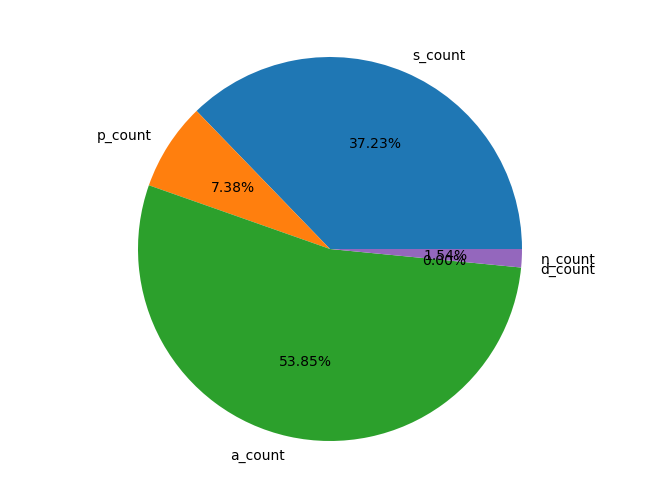

In [122]:
# Visualization 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
total_token_count = ['s_count', 'p_count', 'a_count','d_count','n_count']
data = [s_count, p_count, a_count,d_count,n_count]
ax.pie(data, labels = total_token_count,autopct='%1.2f%%')
plt.show()

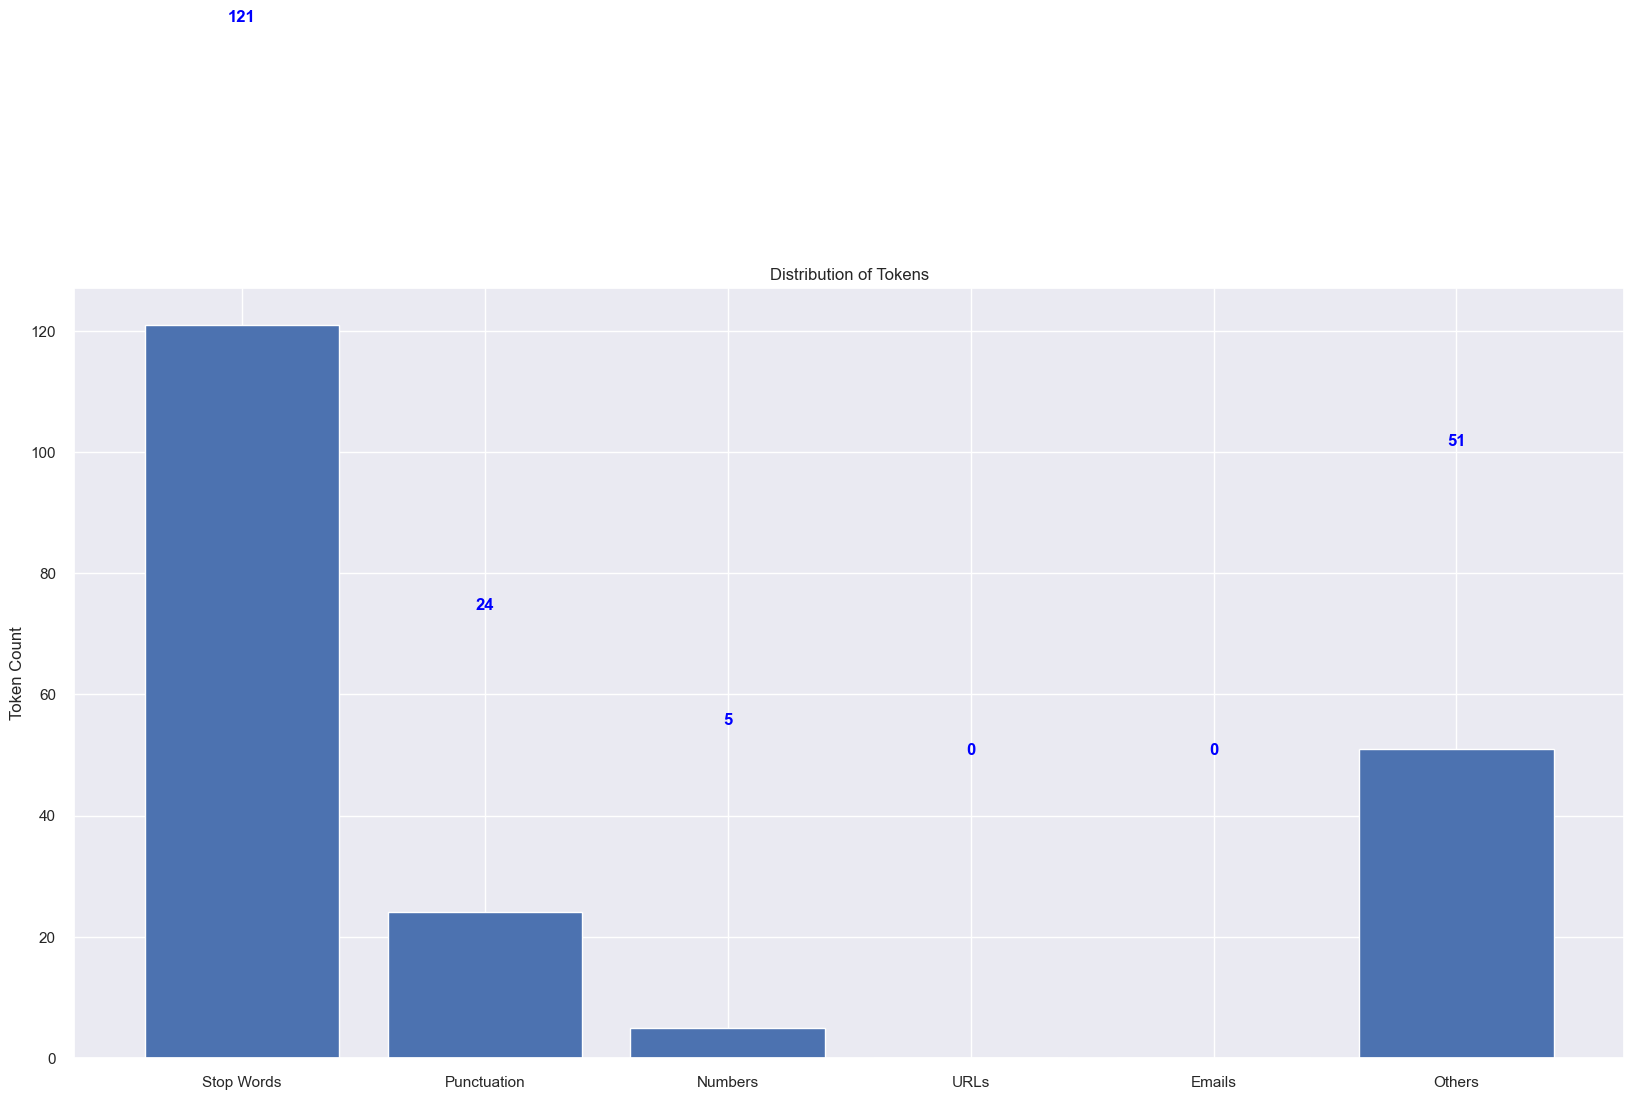

In [558]:
import matplotlib.pyplot as plt

total_token_count = ['Stop Words', 'Punctuation', 'Numbers', 'URLs', 'Emails', 'Others']
data = [s_count, p_count, n_count, url_count, email_count, token_count - (s_count + p_count + n_count + url_count + email_count)]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(total_token_count, data)
ax.set_ylabel('Token Count')
ax.set_title('Distribution of Tokens')

# Add number labels
for i, v in enumerate(data):
    ax.text(i, v + 50, str(v), color='blue', fontweight='bold', ha='center')

plt.show()

In [564]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
token_str = ' '.join(token for token in doc1)

# Create and generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(token_str)

# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: sequence item 0: expected str instance, spacy.tokens.token.Token found

In [559]:
# FORMING CLEANED DOC:

cleaned_doc=[token for token in doc1 if not token.is_stop and not token.is_punct and not token.like_num and not token.like_url and not token.like_email]

In [560]:
token_clean=0
for token in cleaned_doc:
    token_clean=token_clean+1
    print(token.text)

calculate
similarities
documents
sim
object
print
resulting
similarity
matrix
case
output
4x4
matrix
element
represents
cosine
similarity
documents
Note
MatrixSimilarity
similarity
measures
cosine
similarity
specifying
different
num_best
parameter
example
setting
num_best=1
return
document
highest
similarity
score


In [561]:
print("The length of cleaned doc is",token_clean)

The length of cleaned doc is 36


C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


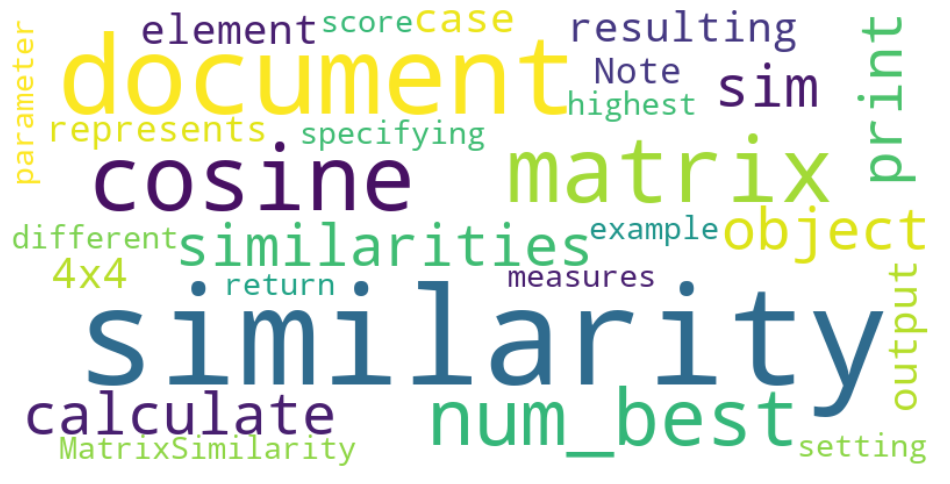

In [571]:
# assuming `cleaned_doc` is a list of spacy token objects
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([token.text for token in cleaned_doc]))

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


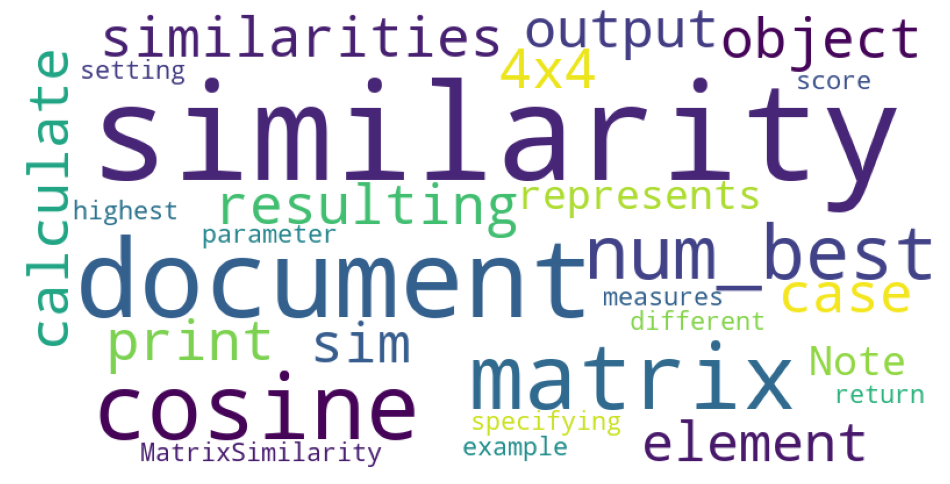

In [574]:
# assuming `preprocessed_text` is a list of preprocessed words
cleaned_doc_strings = [str(token) for token in cleaned_doc]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_doc_strings))

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## TAGGING:

POS tagging is the process of labeling each word in a text with its corresponding part of speech, such as noun, verb, adjective, etc. This information can be useful in a variety of natural language processing tasks, such as text classification, information retrieval, and machine translation. For example, in text classification, knowing the POS tags of words can help us identify which words are most important in distinguishing between different categories of text.

In addition to POS tagging, spaCy provides a wide range of other natural language processing capabilities, such as named entity recognition, dependency parsing, and text classification. By using these tools, we can gain a deeper understanding of the structure and meaning of natural language text, which can be useful in a wide range of applications.

### Parts of Speech-POS

In [123]:
for token in doc1:
    print(token,'==>',token.pos_)

India ==> PROPN
, ==> PUNCT
a ==> DET
South ==> ADJ
Asian ==> ADJ
nation ==> NOUN
, ==> PUNCT
is ==> AUX
the ==> DET
seventh ==> ADV
- ==> PUNCT
largest ==> ADJ
country ==> NOUN
by ==> ADP
area ==> NOUN
, ==> PUNCT
the ==> DET
second ==> ADV
- ==> PUNCT
most ==> ADV
populous ==> ADJ
country ==> NOUN
with ==> ADP
over ==> ADP
1.38 ==> NUM
billion ==> NUM
people ==> NOUN
, ==> PUNCT
and ==> CCONJ
the ==> DET
most ==> ADV
populous ==> ADJ
democracy ==> NOUN
in ==> ADP
the ==> DET
world ==> NOUN
. ==> PUNCT
India ==> PROPN
boasts ==> VERB
of ==> ADP
an ==> DET
immensely ==> ADV
rich ==> ADJ
cultural ==> ADJ
heritage ==> NOUN
, ==> PUNCT
including ==> VERB
numerous ==> ADJ
languages ==> NOUN
, ==> PUNCT
traditions ==> NOUN
, ==> PUNCT
and ==> CCONJ
people ==> NOUN
. ==> PUNCT
The ==> DET
country ==> NOUN
holds ==> VERB
its ==> PRON
uniqueness ==> NOUN
in ==> ADP
its ==> PRON
diversity ==> NOUN
, ==> PUNCT
and ==> CCONJ
hence ==> ADV
has ==> AUX
adapted ==> VERB
itself ==> PRON
to ==> ADP
in

In [124]:
spacy.explain('AUX')

'auxiliary'

In [169]:
# pos count:
pos_count=doc1.count_by(spacy.attrs.POS)
pos_count

{96: 3,
 97: 24,
 90: 20,
 84: 29,
 92: 48,
 87: 9,
 86: 9,
 85: 24,
 93: 4,
 89: 10,
 100: 12,
 95: 5,
 98: 3,
 94: 1}

In [171]:
for x,y in sorted(pos_count.items()):
    print(x,doc1.vocab[x].text,y)

84 ADJ 29
85 ADP 24
86 ADV 9
87 AUX 9
89 CCONJ 10
90 DET 20
92 NOUN 48
93 NUM 4
94 PART 1
95 PRON 5
96 PROPN 3
97 PUNCT 24
98 SCONJ 3
100 VERB 12


## Visualisation of POS

In [173]:
from spacy import displacy
displacy.render(doc1,style='dep') # Dependence

In [175]:
options={'compact':'True','color':'blue'}

displacy.render(doc1,style='dep',options=options)

In [125]:
## summary of token:

In [126]:
# Total number of tokens

token_count=0
stop_count=0
punct_count=0
num_count=0
stop_list = []
for token in doc1:
    token_count=token_count+1
    if token.is_stop:
        stop_count=stop_count+1
        stop_list.append(token.text)
    if token.is_punct:
        punct_count=punct_count+1
    if token.like_num:
        num_count=num_count+1
print(' The total number of tokens:',token_count)
print('Total number of stop words in the doc:',stop_count)
print(' The total number of puncuations in the doc:',punct_count)
print(' Count of numbers in the doc:',num_count)

 The total number of tokens: 201
Total number of stop words in the doc: 80
 The total number of puncuations in the doc: 24
 Count of numbers in the doc: 5


In [127]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(doc1):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[25:50]

text         lemma    pos  tag     dep is_alpha is_stop  \
25    billion    (billion,)    NUM   CD  nummod     True   False   
26     people     (people,)   NOUN  NNS    pobj     True   False   
27          ,          (,,)  PUNCT    ,   punct    False   False   
28        and        (and,)  CCONJ   CC      cc     True    True   
29        the        (the,)    DET   DT     det     True    True   
30       most       (most,)    ADV  RBS  advmod     True    True   
31   populous   (populous,)    ADJ   JJ    amod     True   False   
32  democracy  (democracy,)   NOUN   NN    conj     True   False   
33         in         (in,)    ADP   IN    prep     True    True   
34        the        (the,)    DET   DT     det     True    True   
35      world      (world,)   NOUN   NN    pobj     True   False   
36          .          (.,)  PUNCT    .   punct    False   False   
37      India      (India,)  PROPN  NNP   nsubj     True   False   
38     boasts      (boast,)   VERB  VBZ    ROOT     True   False   
39         of         (of,)    ADP   IN    prep     True    True   
40         an         (an,)    DET   DT     det     True    True   
41  immensely  (immensely,)    ADV   RB  advmod     True   False   
42       rich       (rich,)    ADJ   JJ    amod     True   False   
43   cultural   (cultural,)    ADJ   JJ    amod     True   False   
44   heritage   (heritage,)   NOUN   NN    pobj     True   False   
45          ,          (,,)  PUNCT    ,   punct    False   False   
46  including    (include,)   VERB  VBG    prep     True   False   
47   numerous   (numerous,)    ADJ   JJ    amod     True   False   
48  languages   (language,)   NOUN  NNS    pobj     True   False   
49          ,          (,,)  PUNCT    ,   punct    False   False   

   is_punctuation  
25          False  
26          False  
27           True  
28          False  
29          False  
30          False  
31          False  
32          False  
33          False  
34          False  
35          False  
36           True  
37          False  
38          False  
39          False  
40          False  
41          False  
42          False  
43          False  
44          False  
45           True  
46          False  
47          False  
48          False  
49           True

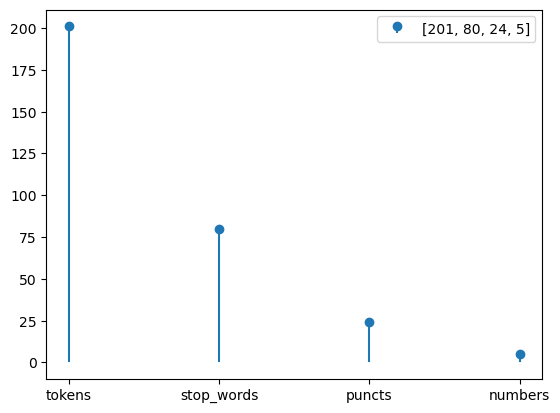

In [128]:
# visulaization of summary:
import matplotlib.pyplot as plt
figo,axeso = plt.subplots()
axeso.stem(['tokens','stop_words','puncts','numbers'], [token_count,stop_count,punct_count,num_count],
           label=[token_count,stop_count,punct_count,num_count],use_line_collection=True, basefmt=' ')
axeso.legend()
plt.show()

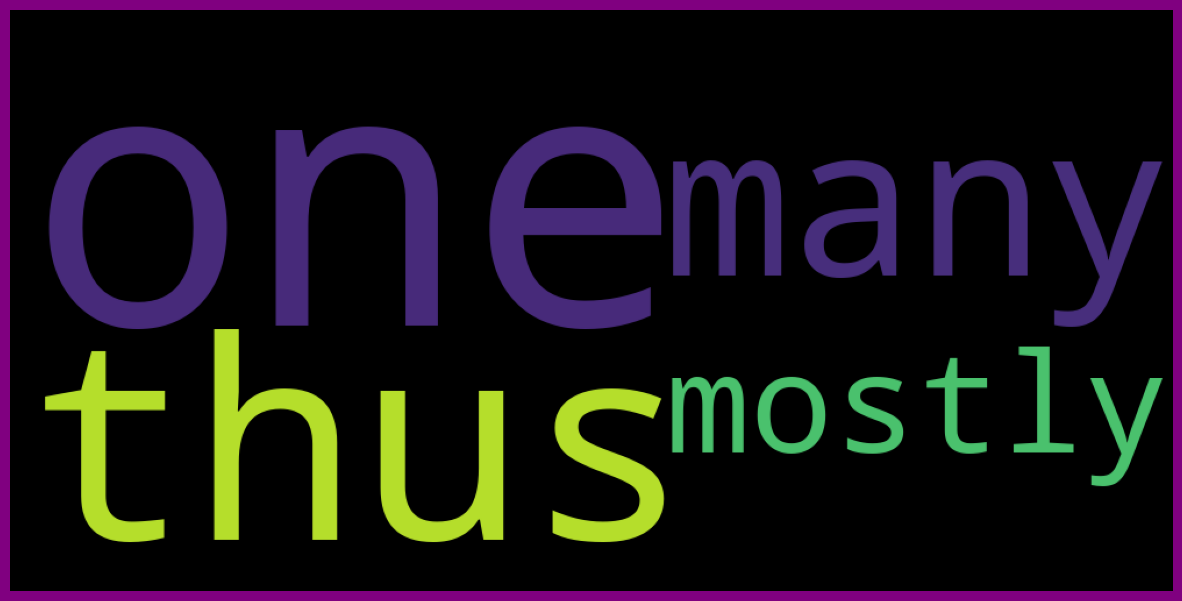

In [129]:
# Visualising - Most Common Stop Words:
from wordcloud import WordCloud
unique_string=(" ").join(stop_list)
unique_string = unique_string.lower()
wordcloud = WordCloud(width = 1000, height = 500, background_color ='black').generate(unique_string)
plt.figure(figsize=(15,8), facecolor = "purple")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [552]:
# EXTRA:
# LEMMATIZATION:

for token in doc1:
    print(token.text,'-',token.lemma_)

We - we
calculate - calculate
the - the
similarities - similarity
between - between
documents - document
using - use
the - the
sim - sim
object - object
and - and
print - print
the - the
resulting - result
similarity - similarity
matrix - matrix
. - .
In - in
this - this
case - case
, - ,
the - the
output - output
will - will
be - be
a - a
4x4 - 4x4
matrix - matrix
, - ,
where - where
each - each
element - element
represents - represent
the - the
cosine - cosine
similarity - similarity
between - between
two - two
documents - document
. - .
Note - note
that - that
MatrixSimilarity - MatrixSimilarity
can - can
be - be
used - use
with - with
other - other
similarity - similarity
measures - measure
besides - besides
cosine - cosine
similarity - similarity
by - by
specifying - specify
a - a
different - different
num_best - num_b
parameter - parameter
. - .
For - for
example - example
, - ,
setting - set
num_best=1 - num_best=1
will - will
return - return
the - the
document - document
with -

In [538]:
# EXTRA:
# Visualisation of POS:

#NOUN_COUNT

noun_count=0

for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email :
        if token.pos_=='NOUN':
            noun_count=noun_count+1
            print(token.text,'====>',token.pos_)
            
# poS=VERB

verb_count=0

for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email  :
        if token.pos_=='VERB':
            verb_count=verb_count+1
            print(token.text,'====>',token.pos_)
            
# poS=PROPN

propn_count=0

for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email  :
        if token.pos_=='PROPN':
            propn_count=propn_count+1
            print(token.text,'====>',token.pos_)
            
# poS=ADJ

adj_count=0
for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email   :
        if token.pos_=='ADJ':
            adj_count=adj_count+1
            print(token.text,'====>',token.pos_)
print(' The count of tokens with PoS as ADJ:',adj_count)

# poS=ADV

adv_count=0
for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email   :
        if token.pos_=='ADV':
            adv_count=adv_count+1
            print(token.text,'====>',token.pos_)

pos_dict={'noun':noun_count,'verb':verb_count,'propn':propn_count,'adj':adj_count,'adv':adv_count}


similarities ====> NOUN
documents ====> NOUN
object ====> NOUN
similarity ====> NOUN
matrix ====> NOUN
case ====> NOUN
output ====> NOUN
matrix ====> NOUN
element ====> NOUN
similarity ====> NOUN
documents ====> NOUN
similarity ====> NOUN
measures ====> NOUN
cosine ====> NOUN
similarity ====> NOUN
parameter ====> NOUN
example ====> NOUN
document ====> NOUN
similarity ====> NOUN
score ====> NOUN
calculate ====> VERB
print ====> VERB
resulting ====> VERB
represents ====> VERB
Note ====> VERB
specifying ====> VERB
setting ====> VERB
return ====> VERB
MatrixSimilarity ====> PROPN
num_best=1 ====> PROPN
sim ====> ADJ
cosine ====> ADJ
different ====> ADJ
num_best ====> ADJ
highest ====> ADJ
 The count of tokens with PoS as ADJ: 5


In [539]:
import pandas as pd
pos_series=pd.Series(pos_dict)
pos_series

noun     20
verb      8
propn     2
adj       5
adv       0
dtype: int64

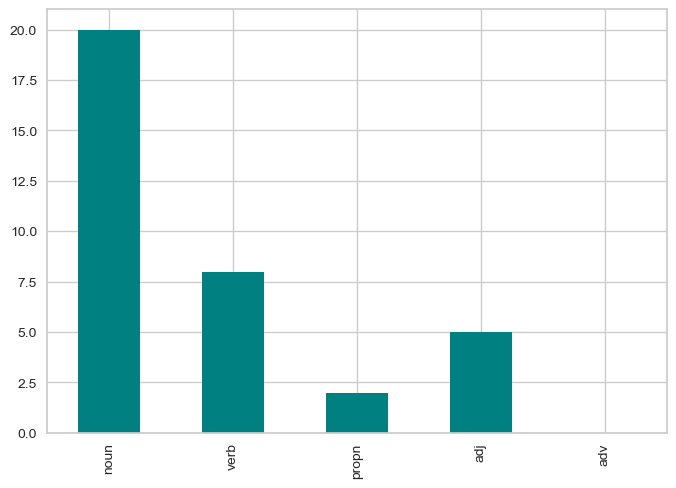

In [540]:
pos_series.plot(kind='bar',color='teal');

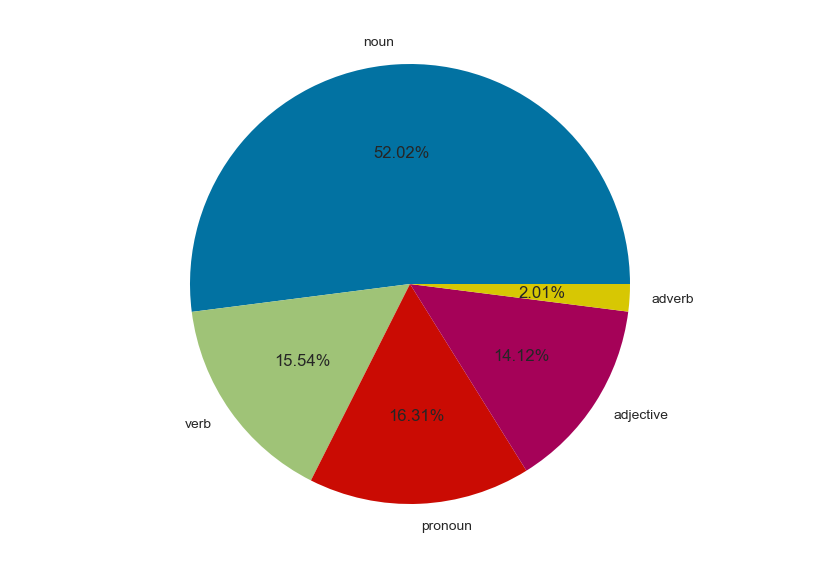

In [541]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pos = ['noun', 'verb', 'pronoun', 'adjective', 'adverb']
data = [1426,426,447,387,55]
ax.pie(data, labels = pos,autopct='%1.2f%%')
plt.show()

## STORE TOKEN IN A DATAFRAME

In [130]:
# Creating columns for the DF

cols=['Token','POS','Explain_POS','Tag','Explain_Tag']
cols

['Token', 'POS', 'Explain_POS', 'Tag', 'Explain_Tag']

In [131]:
rows=[]
for token in doc1:
    row=token,token.pos_,spacy.explain(token.pos_),token.tag_,spacy.explain(token.tag_)
    rows.append(row)
rows

[(India, 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 (,, 'PUNCT', 'punctuation', ',', 'punctuation mark, comma'),
 (a, 'DET', 'determiner', 'DT', 'determiner'),
 (South,
  'ADJ',
  'adjective',
  'JJ',
  'adjective (English), other noun-modifier (Chinese)'),
 (Asian,
  'ADJ',
  'adjective',
  'JJ',
  'adjective (English), other noun-modifier (Chinese)'),
 (nation, 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 (,, 'PUNCT', 'punctuation', ',', 'punctuation mark, comma'),
 (is, 'AUX', 'auxiliary', 'VBZ', 'verb, 3rd person singular present'),
 (the, 'DET', 'determiner', 'DT', 'determiner'),
 (seventh, 'ADV', 'adverb', 'RB', 'adverb'),
 (-, 'PUNCT', 'punctuation', 'HYPH', 'punctuation mark, hyphen'),
 (largest, 'ADJ', 'adjective', 'JJS', 'adjective, superlative'),
 (country, 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 (by, 'ADP', 'adposition', 'IN', 'conjunction, subordinating or preposition'),
 (area, 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 (,, 'PUNCT', 'p

In [132]:
import pandas as pd
token_df=pd.DataFrame(rows,columns=cols)
token_df

Token    POS  Explain_POS  Tag  \
0       India  PROPN  proper noun  NNP   
1           ,  PUNCT  punctuation    ,   
2           a    DET   determiner   DT   
3       South    ADJ    adjective   JJ   
4       Asian    ADJ    adjective   JJ   
..        ...    ...          ...  ...   
196     ample    ADJ    adjective   JJ   
197    source   NOUN         noun   NN   
198        of    ADP   adposition   IN   
199  manpower   NOUN         noun   NN   
200         .  PUNCT  punctuation    .   

                                           Explain_Tag  
0                                noun, proper singular  
1                              punctuation mark, comma  
2                                           determiner  
3    adjective (English), other noun-modifier (Chin...  
4    adjective (English), other noun-modifier (Chin...  
..                                                 ...  
196  adjective (English), other noun-modifier (Chin...  
197                             noun, singular or mass  
198          conjunction, subordinating or preposition  
199                             noun, singular or mass  
200                  punctuation mark, sentence closer  

[201 rows x 5 columns]

In [133]:
token_df['POS'].value_counts()

NOUN     48
ADJ      29
PUNCT    24
ADP      24
DET      20
VERB     12
CCONJ    10
AUX       9
ADV       9
PRON      5
NUM       4
PROPN     3
SCONJ     3
PART      1
Name: POS, dtype: int64

## COnverting a text into a DF with tokens, pos 

In [184]:
text_df

Sentence                         Token  \
0          Today is Monday           [Today, is, Monday]   
1      Tomorrow is Tuesday       [Tomorrow, is, Tuesday]   
2  Yesterday was a holiday  [Yesterday, was, a, holiday]   

                      POS  
0      [NOUN, AUX, PROPN]  
1      [NOUN, AUX, PROPN]  
2  [NOUN, AUX, DET, NOUN]

In [185]:
token=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
token

[['Today', 'is', 'Monday'],
 ['Tomorrow', 'is', 'Tuesday'],
 ['Yesterday', 'was', 'a', 'holiday']]

In [186]:
token=[]
pos=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
        pos.append([word.pos_ for word in sent])
print(token)
print(pos)

[['Today', 'is', 'Monday'], ['Tomorrow', 'is', 'Tuesday'], ['Yesterday', 'was', 'a', 'holiday']]
[['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'DET', 'NOUN']]


In [187]:
# Updating text_df

text_df['Token']=token
text_df['POS']=pos

In [188]:
text_df

Sentence                         Token  \
0          Today is Monday           [Today, is, Monday]   
1      Tomorrow is Tuesday       [Tomorrow, is, Tuesday]   
2  Yesterday was a holiday  [Yesterday, was, a, holiday]   

                      POS  
0      [NOUN, AUX, PROPN]  
1      [NOUN, AUX, PROPN]  
2  [NOUN, AUX, DET, NOUN]

### SESSION 3

### Stream of strings as input

When there is a stream of strings as input, we need to 

use nlp.pipe() instead of nlp().

In [134]:
# List of strings:

In [135]:
text_2=['Today is Monday','Tomorrow is Tuesday',
       'Yesterday was a holiday']

In [136]:
type(text_2)

list

In [137]:
text_2[0]

'Today is Monday'

In [138]:
text_2[1]

'Tomorrow is Tuesday'

In [139]:
for sentence in nlp.pipe(text_2):
    print(sentence)

Today is Monday
Tomorrow is Tuesday
Yesterday was a holiday


In [140]:
# Tokens

for sentence in nlp.pipe(text_2):
    print(sentence)
    for token in sentence:
        print(token)

Today is Monday
Today
is
Monday
Tomorrow is Tuesday
Tomorrow
is
Tuesday
Yesterday was a holiday
Yesterday
was
a
holiday


In [141]:
# Tuple of strings

In [142]:
text_3=('Today is Monday','Tomorrow is Tuesday',
       'Yesterday was Sundaya,a holiday')

In [143]:
type(text_3)

tuple

In [144]:
text_3[0]

'Today is Monday'

In [145]:
for sent in nlp.pipe(text_3):
    print(sent)
    for token in sent:
        print(token)

Today is Monday
Today
is
Monday
Tomorrow is Tuesday
Tomorrow
is
Tuesday
Yesterday was Sundaya,a holiday
Yesterday
was
Sundaya
,
a
holiday


In [146]:
# List of tuples

In [147]:
text_4=[('Today is Monday'),('Tomorrow is Tuesday'),
       ('Yesterday was Sundaya,a holiday')]

In [148]:
type(text_4)

list

In [149]:
text_4[0]

'Today is Monday'

In [150]:
sent_count=0
for sent in nlp.pipe(text_4):
    sent_count=sent_count+1
    print(sent_count,'=>',sent)
    for token in sent:
        print(token)

1 => Today is Monday
Today
is
Monday
2 => Tomorrow is Tuesday
Tomorrow
is
Tuesday
3 => Yesterday was Sundaya,a holiday
Yesterday
was
Sundaya
,
a
holiday


### A DataFrame

In [151]:
text_2

['Today is Monday', 'Tomorrow is Tuesday', 'Yesterday was a holiday']

In [152]:
text_df=pd.DataFrame(text_2,columns=['Sentence'])
text_df

Sentence
0          Today is Monday
1      Tomorrow is Tuesday
2  Yesterday was a holiday

In [153]:
text_df['Sentence']

0            Today is Monday
1        Tomorrow is Tuesday
2    Yesterday was a holiday
Name: Sentence, dtype: object

In [154]:
for sent in nlp.pipe(text_df['Sentence']):
    print(sent)
    for token in sent:
        print(token)

Today is Monday
Today
is
Monday
Tomorrow is Tuesday
Tomorrow
is
Tuesday
Yesterday was a holiday
Yesterday
was
a
holiday


In [156]:
doc1

India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a 

In [158]:
for token in doc1:
    print(token)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

## Separating doc into sentences

In [161]:
for sent in doc1.sents:
    print(sent)

India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world.
India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people.
The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort.
While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills.
Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.
Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a

In [163]:
sent_count=0
for sent in doc1.sents:
    sent_count=sent_count+1
    print(sent_count,'==>',sent)

1 ==> India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world.
2 ==> India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people.
3 ==> The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort.
4 ==> While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills.
5 ==> Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.
6 ==> Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of 

## COnverting a text into a DF with tokens, pos 

In [189]:
text_df

Sentence                         Token  \
0          Today is Monday           [Today, is, Monday]   
1      Tomorrow is Tuesday       [Tomorrow, is, Tuesday]   
2  Yesterday was a holiday  [Yesterday, was, a, holiday]   

                      POS  
0      [NOUN, AUX, PROPN]  
1      [NOUN, AUX, PROPN]  
2  [NOUN, AUX, DET, NOUN]

In [190]:
token=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
token

[['Today', 'is', 'Monday'],
 ['Tomorrow', 'is', 'Tuesday'],
 ['Yesterday', 'was', 'a', 'holiday']]

In [191]:
token=[]
pos=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
        pos.append([word.pos_ for word in sent])
print(token)
print(pos)

[['Today', 'is', 'Monday'], ['Tomorrow', 'is', 'Tuesday'], ['Yesterday', 'was', 'a', 'holiday']]
[['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'DET', 'NOUN']]


In [192]:
# Updating text_df

text_df['Token']=token
text_df['POS']=pos

In [193]:
text_df

Sentence                         Token  \
0          Today is Monday           [Today, is, Monday]   
1      Tomorrow is Tuesday       [Tomorrow, is, Tuesday]   
2  Yesterday was a holiday  [Yesterday, was, a, holiday]   

                      POS  
0      [NOUN, AUX, PROPN]  
1      [NOUN, AUX, PROPN]  
2  [NOUN, AUX, DET, NOUN]

## SESSION 4

## Parser and NER

## Parser

Tries to find the dependence between the tokens.

A parser takes a sequence of words and assigns a syntactic structure to them according to a set of grammatical rules. The output of a parser is usually a tree or a graph that shows the relationships between the words in the sentence.

The main goal of a parser is to determine the grammatical structure of a sentence, which can be useful for various NLP tasks such as information extraction, text classification, and machine translation. A parser can also be used to identify the meaning of a sentence by analyzing its structure, as well as to generate new sentences that follow the same grammatical rules.

In [195]:
for token in doc1:
    print(token.text,'==>',token.dep_)

India ==> nsubj
, ==> punct
a ==> det
South ==> amod
Asian ==> amod
nation ==> appos
, ==> punct
is ==> ROOT
the ==> det
seventh ==> advmod
- ==> punct
largest ==> amod
country ==> attr
by ==> prep
area ==> pobj
, ==> punct
the ==> det
second ==> advmod
- ==> punct
most ==> advmod
populous ==> amod
country ==> appos
with ==> prep
over ==> quantmod
1.38 ==> compound
billion ==> nummod
people ==> pobj
, ==> punct
and ==> cc
the ==> det
most ==> advmod
populous ==> amod
democracy ==> conj
in ==> prep
the ==> det
world ==> pobj
. ==> punct
India ==> nsubj
boasts ==> ROOT
of ==> prep
an ==> det
immensely ==> advmod
rich ==> amod
cultural ==> amod
heritage ==> pobj
, ==> punct
including ==> prep
numerous ==> amod
languages ==> pobj
, ==> punct
traditions ==> conj
, ==> punct
and ==> cc
people ==> conj
. ==> punct
The ==> det
country ==> nsubj
holds ==> ROOT
its ==> poss
uniqueness ==> dobj
in ==> prep
its ==> poss
diversity ==> pobj
, ==> punct
and ==> cc
hence ==> advmod
has ==> aux
adapted

In [196]:
from spacy import displacy

displacy.render(doc1,style='dep')

In [197]:
spacy.explain('nsubj')

'nominal subject'

In [198]:
for token in doc1:
    print(token.text,'==>',token.head)

India ==> is
, ==> India
a ==> nation
South ==> Asian
Asian ==> nation
nation ==> India
, ==> India
is ==> is
the ==> country
seventh ==> largest
- ==> largest
largest ==> country
country ==> is
by ==> country
area ==> by
, ==> country
the ==> country
second ==> populous
- ==> most
most ==> populous
populous ==> country
country ==> country
with ==> country
over ==> billion
1.38 ==> billion
billion ==> people
people ==> with
, ==> country
and ==> country
the ==> democracy
most ==> populous
populous ==> democracy
democracy ==> country
in ==> democracy
the ==> world
world ==> in
. ==> is
India ==> boasts
boasts ==> boasts
of ==> boasts
an ==> heritage
immensely ==> rich
rich ==> heritage
cultural ==> heritage
heritage ==> of
, ==> heritage
including ==> heritage
numerous ==> languages
languages ==> including
, ==> languages
traditions ==> languages
, ==> traditions
and ==> traditions
people ==> traditions
. ==> boasts
The ==> country
country ==> holds
holds ==> holds
its ==> uniqueness
un

In [199]:
## Noun chunks

for chunk in doc1.noun_chunks:
    print(chunk.text, '==>',chunk.label_)

India ==> NP
a South Asian nation ==> NP
the seventh-largest country ==> NP
area ==> NP
the second-most populous country ==> NP
over 1.38 billion people ==> NP
the most populous democracy ==> NP
the world ==> NP
India ==> NP
an immensely rich cultural heritage ==> NP
numerous languages ==> NP
traditions ==> NP
people ==> NP
The country ==> NP
its uniqueness ==> NP
its diversity ==> NP
itself ==> NP
international changes ==> NP
poise ==> NP
comfort ==> NP
the economy ==> NP
international companies ==> NP
it ==> NP
open arms ==> NP
liberalisation ==> NP
Indians ==> NP
global approaches ==> NP
skills ==> NP
Indian villagers ==> NP
farming, advanced agriculture ==> NP
unique handicrafts ==> NP
their profession ==> NP
one hand ==> NP
the modern industries ==> NP
professional services sectors ==> NP
a big way ==> NP
the country ==> NP
many global majors ==> NP
strategic investments ==> NP
the presence ==> NP
a vast range ==> NP
industries ==> NP
investment avenues ==> NP
a supportive Governm

## NER: NAMED EMTITY RECOGNIZER

In [201]:
for token in doc1:
    print(token.text)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

In [203]:
for ent in doc1.ents:
    print(ent.text,'==>',ent.label_)

India ==> GPE
South Asian ==> NORP
seventh ==> ORDINAL
second ==> ORDINAL
1.38 billion ==> CARDINAL
India ==> GPE
the 1990s ==> DATE
Indians ==> NORP
Indian ==> NORP


In [204]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

In [206]:
# List of entities

ent_list=[]
for ent in doc1.ents:
    ent_list.append(ent.label_)

In [207]:
print(ent_list)

['GPE', 'NORP', 'ORDINAL', 'ORDINAL', 'CARDINAL', 'GPE', 'DATE', 'NORP', 'NORP']


In [208]:
# List of tuples of text and the respective entities

for ent in doc1.ents:
    print(ent.text, ent.label_)

India GPE
South Asian NORP
seventh ORDINAL
second ORDINAL
1.38 billion CARDINAL
India GPE
the 1990s DATE
Indians NORP
Indian NORP


In [209]:
ent_list=[(ent.text,ent.label_) for ent in doc1.ents]

In [210]:
print(ent_list)

[('India', 'GPE'), ('South Asian', 'NORP'), ('seventh', 'ORDINAL'), ('second', 'ORDINAL'), ('1.38 billion', 'CARDINAL'), ('India', 'GPE'), ('the 1990s', 'DATE'), ('Indians', 'NORP'), ('Indian', 'NORP')]


#### OR

In [215]:
# LIST OF ENTITIES:

In [213]:
for ent in doc1.ents:
    print(ent.text,'==>',ent.label_)

India ==> GPE
South Asian ==> NORP
seventh ==> ORDINAL
second ==> ORDINAL
1.38 billion ==> CARDINAL
India ==> GPE
the 1990s ==> DATE
Indians ==> NORP
Indian ==> NORP


In [217]:
# COUNTING NUMBER OF ENTITIES:

ent_list=[]
for ent in doc1.ents:
    ent_list.append(ent.label_)
print(ent_list)

['GPE', 'NORP', 'ORDINAL', 'ORDINAL', 'CARDINAL', 'GPE', 'DATE', 'NORP', 'NORP']


In [218]:
from collections import Counter
Counter(ent_list)

Counter({'GPE': 2, 'NORP': 3, 'ORDINAL': 2, 'CARDINAL': 1, 'DATE': 1})

In [ ]:
# EXTRA: #############################

In [543]:
eco_ent_count=[ent.label_ for ent in doc.ents]
print(eco_ent_count)

['CARDINAL', 'CARDINAL', 'ORG']


In [544]:
entity_counts=Counter(eco_ent_count)
entity_counts_dict={}
for i in entity_counts.elements():
    entity_counts_dict[i]=entity_counts[i]
print(entity_counts_dict)

{'CARDINAL': 2, 'ORG': 1}


C:\Users\pc\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\pc\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='0', ylabel='1'>

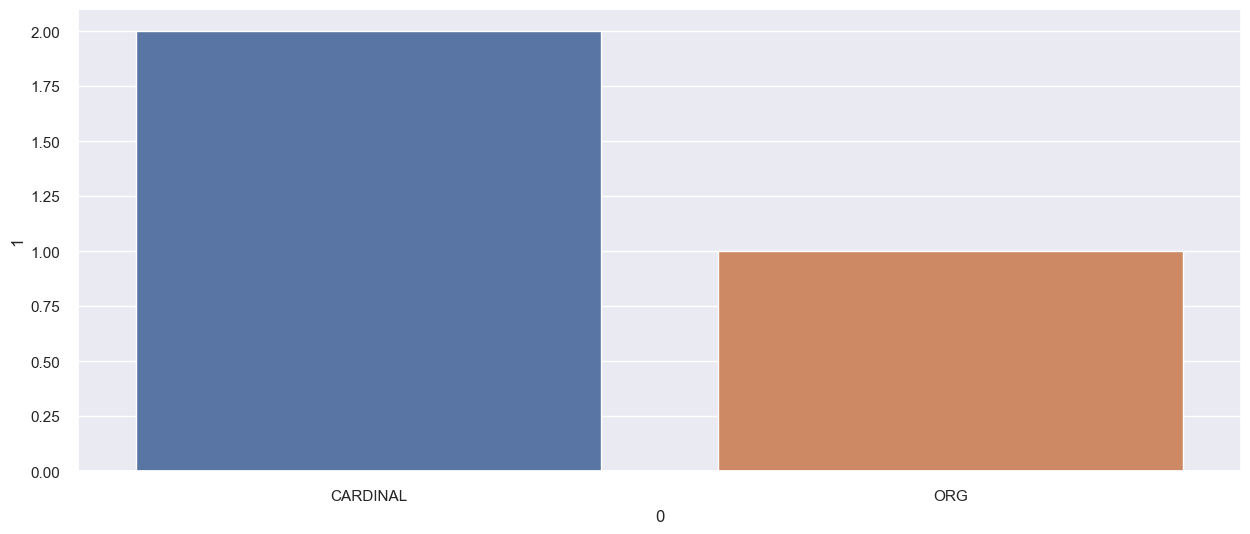

In [545]:
entity_df = pd.DataFrame(entity_counts_dict.items())
sns.set(rc = {'figure.figsize':(15,6)})
sns.barplot(data = entity_df,x=0,y=1)

In [ ]:
#########################

In [220]:
# Entities most appeared:

most_ent=[]
for ent in doc1.ents:
    most_ent.append(ent.text)
print(most_ent)

['India', 'South Asian', 'seventh', 'second', '1.38 billion', 'India', 'the 1990s', 'Indians', 'Indian']


In [221]:
# Most common

Counter(most_ent).most_common()

[('India', 2),
 ('South Asian', 1),
 ('seventh', 1),
 ('second', 1),
 ('1.38 billion', 1),
 ('the 1990s', 1),
 ('Indians', 1),
 ('Indian', 1)]

In [222]:
# most common 10 entities:
Counter(most_ent).most_common(10)

[('India', 2),
 ('South Asian', 1),
 ('seventh', 1),
 ('second', 1),
 ('1.38 billion', 1),
 ('the 1990s', 1),
 ('Indians', 1),
 ('Indian', 1)]

In [223]:
print(len(doc1.ents))

9


## VISUALISING NAMED ENTITIES

In [212]:
displacy.render(doc1, style='ent')

## NER FOR WEB DATA:

In [224]:
import requests

In [225]:
from bs4 import BeautifulSoup

In [226]:
url='https://en.wikipedia.org/wiki/India'

In [227]:
print(url)

https://en.wikipedia.org/wiki/India


In [228]:
request=requests.get(url)

In [229]:
print(request)

<Response [200]>


In [230]:
request=request.text
print(request)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>India - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-conte

In [231]:
soup_request=BeautifulSoup(request)
print(soup_request)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>India - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-conte

In [232]:
text= soup_request.body.text
print(text)


Jump to content









Main menu





Main menu
move to sidebar
hide



		Navigation
	

Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate




		Contribute
	

HelpLearn to editCommunity portalRecent changesUpload file




Languages

Language links are at the top of the page across from the title.



















Search















Create accountLog in






Personal tools




 Create account Log in




		Pages for logged out editors learn more


ContributionsTalk























Contents
move to sidebar
hide




(Top)





1Etymology







2History


				Toggle History subsection
			




2.1Ancient India







2.2Medieval India







2.3Early modern India







2.4Modern India









3Geography







4Biodiversity







5Politics and government


				Toggle Politics and government subsection
			




5.1Politics







5.2Government







5.3Administrative divisions





5.3.1States







5.3.2Union territories











6Foreign, eco

In [233]:
type(text)

str

### Converting the above str to document using NLP

In [234]:
doc3=nlp(text)

In [235]:
type(doc3)

spacy.tokens.doc.Doc

In [236]:
doc3


Jump to content









Main menu





Main menu
move to sidebar
hide



		Navigation
	

Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate




		Contribute
	

HelpLearn to editCommunity portalRecent changesUpload file




Languages

Language links are at the top of the page across from the title.



















Search















Create accountLog in






Personal tools




 Create account Log in




		Pages for logged out editors learn more


ContributionsTalk























Contents
move to sidebar
hide




(Top)





1Etymology







2History


				Toggle History subsection
			




2.1Ancient India







2.2Medieval India







2.3Early modern India







2.4Modern India









3Geography







4Biodiversity







5Politics and government


				Toggle Politics and government subsection
			




5.1Politics







5.2Government







5.3Administrative divisions





5.3.1States







5.3.2Union territories











6Foreign, eco

In [237]:
# NOW PERFORM TOKENIZER ALL STEPS:
# NOW PERFORM NER ALL STEPS FOR DOC 3

## SESSION 5

## Rule based matching

Rule-based matching is a technique in natural language processing (NLP) that allows you to find and extract specific patterns or phrases from text data. It involves defining a set of rules or patterns that match specific sequences of tokens (words, punctuation, etc.) in a document.

In [238]:
# AFTER PERFORMING: ALL THE ABOVE STEPS OF TOKENIZATION, TAGGER, NER, PARSING:

### Matching

  1) Token Matching 
  
  2) Phrase Matching
  
  3) Entity Matching

How ?

   1) Create an object/instance of the Matcher class.
   
   2) Define a pattern/rule.
   
   3) Add the pattern to the object
   
   4) Pass the document to the object

In [240]:
from spacy.matcher import Matcher

In [248]:
doc1

India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a 

### Token matching

#### Occurance of text 'India'

In [241]:
# Create an instance of Matcher

matcher_1=Matcher(nlp.vocab)

In [249]:
# Define a pattern or a rule.

# A pattern is a list of dictionaries.

pattern_1=[{'text':'India'}]

In [250]:
# Add pattern to the object

matcher_1.add('Pattern1',[pattern_1])

In [251]:
# Pass the doc to the object

match_1= matcher_1(doc1)

In [252]:
print(len(match_1))

2


In [254]:
for match_id,start,end in match_1:
    span=doc1[start:end]
    print(span.text)

India
India


## Phrase matching

#### Occurance of 'country is'

In [256]:
matcher_2=Matcher(nlp.vocab)
pattern_2=[{'text':'country'},
          {'text':'is'}]
matcher_2.add('Pattern2',[pattern_2])
match_2=matcher_2(doc1)

In [257]:
print(len(match_2))

1


In [259]:
for match_id,start,end in match_2:
    span=doc1[start:end]
    print(span)

country is


### Occurances of language/s, model's

In [265]:
matcher_3=Matcher(nlp.vocab)
pattern_3=[{'LEMMA':'language'},
          {'LEMMA':'model'}]


matcher_3.add('Pattern3',[pattern_3])
match_3=matcher_3(doc1)

In [266]:
# How is lemma different from lemma?,
# LEMMA MEANS IT WILL SOW ALL POSSIBLE FORMS OF LANGUAGE LIKE LANGUAGE, LANGUAGES ETC.
# LEMMA: Will provide lemma root form for this this from the dictionary

In [267]:
print(len(match_3))

0


In [287]:
for match_id,start,end in match_3:
    span=doc1[start:end]
    print(span)

## Occurances of alphabets, digits 

In [270]:
matcher_4=Matcher(nlp.vocab)
pattern_4=[{'IS_ALPHA': True},
           {'IS_DIGIT':True}]


matcher_4.add('Pattern4',[pattern_4])
match_4=matcher_4(doc1)

In [271]:
print(len(match_4))

0


In [288]:
for match_id,start,end in match_4:
    span=doc1[start:end]
    print(span)

## Occurance of launch, discovery, find,,....

In [274]:
matcher_5=Matcher(nlp.vocab)
pattern_5=[{'LEMMA':
            {'IN':['launch','discover','find',
        'invent','create','develop','innovate',
                  'form','initiate']}}]

matcher_5.add('Pattern5',[pattern_5])
match_5=matcher_5(doc1)

In [275]:
# Print all lemmas of these words as placed in the dictionary format

In [276]:
print(len(match_5))

0


In [281]:
for match_id,start,end in match_5:
    span=doc1[start:end]
    print(span)

## Occurance of words of having length>15

In [282]:
# How many words are there witl words having length greater than 15?
# Will use matching in this
# Not directly asked

In [283]:
matcher_6=Matcher(nlp.vocab)
pattern_6=[{'LENGTH':{'>=':15}}]
matcher_6.add('Pattern6',[pattern_6])
match_6=matcher_6(doc1)

In [284]:
print(len(match_6))

0


In [286]:
for match_id,start,end in match_6:
    span=doc1[start:end]
    print(span)

## Words of length 2

In [290]:
matcher_7=Matcher(nlp.vocab)
pattern_7=[{'LENGTH':{'==':2}}]
matcher_7.add('Pattern7',[pattern_7])
match_7=matcher_7(doc1)

In [293]:
for match_id,start,end in match_7:
    span=doc1[start:end]
    print(span)

is
by
in
of
an
in
to
to
in
it
in
in
up
as
on
up
in
on
is
to
of
of
is
an
of


### Entity Matching

### Occurance of ent-type 'PERSON'

In [297]:
matcher_10=Matcher(nlp.vocab)
pattern_10=[{"ENT_TYPE":'PERSON'}]
matcher_10.add('Pattern10',[pattern_10])
match_10=matcher_10(doc1)

In [299]:
print(len(match_10))

0


In [300]:
for match_id,start,end in match_10:
    span=doc[start:end]
    print(span.text)

Refer: https://spacy.io/usage/rule-based-matching

## SESSION 6:

## Vectorisation of tokens and similarity of documents

Vectorization of tokens refers to the process of converting text data into a numerical format that can be used as input for machine learning algorithms. In natural language processing, vectorization is commonly used to represent each word in a document as a vector of numbers, based on its frequency, context, or other linguistic properties.

 it is done for: Numerical representation, Dimensionality reduction, Document classification, Information retrieval

In [301]:
# !pip install gensim

import gensim
import spacy
nlp=spacy.load('en_core_web_sm')

## Create a list of texts

In [302]:
doc_1='''Chat GPT is a highly popular AI-based program that people use for generating dialogues. The chatbot has a language-based model that the developer fine-tunes for human interaction in a conversational manner. 
It’s a simulated chatbot primarily designed for customer service; people use it for various other purposes. But what is it? If you are new to this Chat GPT, this guide is for you, so continue reading. 
What’s Chat GPT?
Chat GPT is an AI chatbot auto-generative system created by Open AI for online customer care. It is a pre-trained generative chat, which makes use of (NLP) Natural Language Processing. The source of its data is textbooks, websites, and various articles, which it uses to model its own language for responding to human interaction.'''

In [303]:
doc_2='''What is Chat GPT and why is everyone talking about it? On Twitter, blogs, and at the office, Chat GPT has taken over the conversation in marketing. However, not everyone is a fan.
So what is Chat GPT? Who better to ask than Chat GPT itself? 
ChatGPT is a variant of the GPT (Generative Pre-training Transformer) language model specifically designed for generating text in a chatbot-like manner. It is trained on a large dataset of human-human conversations and can generate natural language responses to input prompts.
In other words, it is a smart AI technology that will spit out factual, informative and well-written responses to given prompts. The technology presents endless potential with many applications to marketing including customer service, eCommerce, entertainment, resourcing and more! Along with these benefits, many professionals are questioning what such a helpful tool means for working freelancers and industry professionals.'''

In [304]:
doc_3='''ChatGPT is a large language learning model that was designed to imitate human conversation. It can remember things you have said to it in the past and is capable of correcting itself when wrong.
It writes in a human-like way and has a wealth of knowledge because it was trained on all sorts of text from the internet, such as Wikipedia, blog posts, books, and academic articles.
It's easy to learn how to use ChatGPT, but what is more challenging is finding out what its biggest problems are. Here are some that are worth knowing about.
1. ChatGPT Isn't Always Right
It fails at basic math, can't seem to answer simple logic questions, and will even go as far as to argue completely incorrect facts. As social media users can attest, ChatGPT can get it wrong on more than one occasion.'''

In [305]:
doc_4='''Texting, chatting and online messaging can be used for much more than simply communicating with your friends. Online communication can help young people build and develop social skills and gives them a platform to share their skills and help each other out.
Messaging and texting are among the most popular methods of communication among children and teenagers. A study by Common Sense Media in 2018 found that 70% of teenagers report using social media multiple times a day.
Messaging and texting can be much more than ways to communicate. They can also be tools that help young people learn and master important skills.'''

In [306]:
# Creating the list

docs=[doc_1,doc_2,doc_3,doc_4]

In [307]:
print(docs)

['Chat GPT is a highly popular AI-based program that people use for generating dialogues. The chatbot has a language-based model that the developer fine-tunes for human interaction in a conversational manner. \nIt’s a simulated chatbot primarily designed for customer service; people use it for various other purposes. But what is it? If you are new to this Chat GPT, this guide is for you, so continue reading. \nWhat’s Chat GPT?\nChat GPT is an AI chatbot auto-generative system created by Open AI for online customer care. It is a pre-trained generative chat, which makes use of (NLP) Natural Language Processing. The source of its data is textbooks, websites, and various articles, which it uses to model its own language for responding to human interaction.', 'What is Chat GPT and why is everyone talking about it? On Twitter, blogs, and at the office, Chat GPT has taken over the conversation in marketing. However, not everyone is a fan.\nSo what is Chat GPT? Who better to ask than Chat GPT 

## Choosing the tokens

In [308]:
texts=[]# List of all tokens
for document in docs:
    doc=nlp(document)
    text=[] # List of tokens in the document
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.like_num:
            text.append(token.lemma_)
    texts.append(text)

In [309]:
# Preprocessing is done, given by sir or remove stop words etc
# do for all possible preprocessing

In [310]:
print(texts)

[['Chat', 'GPT', 'highly', 'popular', 'AI', 'base', 'program', 'people', 'use', 'generating', 'dialogue', 'chatbot', 'language', 'base', 'model', 'developer', 'fine', 'tune', 'human', 'interaction', 'conversational', 'manner', '\n', 'simulated', 'chatbot', 'primarily', 'design', 'customer', 'service', 'people', 'use', 'purpose', 'new', 'Chat', 'GPT', 'guide', 'continue', 'read', '\n', 'Chat', 'GPT', '\n', 'Chat', 'GPT', 'AI', 'chatbot', 'auto', 'generative', 'system', 'create', 'Open', 'AI', 'online', 'customer', 'care', 'pre', 'train', 'generative', 'chat', 'make', 'use', 'NLP', 'Natural', 'Language', 'Processing', 'source', 'data', 'textbook', 'website', 'article', 'use', 'model', 'language', 'respond', 'human', 'interaction'], ['Chat', 'GPT', 'talk', 'Twitter', 'blog', 'office', 'Chat', 'GPT', 'take', 'conversation', 'marketing', 'fan', '\n', 'Chat', 'GPT', 'well', 'ask', 'Chat', 'GPT', '\n', 'ChatGPT', 'variant', 'GPT', 'Generative', 'pre', 'training', 'Transformer', 'language', 'm

In [312]:
# convert this list later into nlp doc using pipe

In [313]:
print(len(texts))

4


In [314]:
print(len(texts[0]))

76


In [315]:
print(len(texts[1]))

82


In [316]:
print(len(texts[2]))

67


In [317]:
print(len(texts[3]))

54


## Creation of a corpus

Corpus is a collection of tokens in a dictionary format.

In NLP, a corpus is often represented as a collection of tokens in a dictionary format, where each token corresponds to a word or phrase in the text, and its value is a numerical representation of its frequency or other linguistic property.

In [321]:
from gensim.corpora import Dictionary # from class corpus of gensim

dict_1=Dictionary(texts)
print(dict_1)

Dictionary(172 unique tokens: ['\n', 'AI', 'Chat', 'GPT', 'Language']...)


In [322]:
# Will give unique token

In [323]:
# Dict_1 is a corpus that contains tokens in dictionary format

## Giving an ID to each token

In [324]:
print(dict_1.token2id)

{'\n': 0, 'AI': 1, 'Chat': 2, 'GPT': 3, 'Language': 4, 'NLP': 5, 'Natural': 6, 'Open': 7, 'Processing': 8, 'article': 9, 'auto': 10, 'base': 11, 'care': 12, 'chat': 13, 'chatbot': 14, 'continue': 15, 'conversational': 16, 'create': 17, 'customer': 18, 'data': 19, 'design': 20, 'developer': 21, 'dialogue': 22, 'fine': 23, 'generating': 24, 'generative': 25, 'guide': 26, 'highly': 27, 'human': 28, 'interaction': 29, 'language': 30, 'make': 31, 'manner': 32, 'model': 33, 'new': 34, 'online': 35, 'people': 36, 'popular': 37, 'pre': 38, 'primarily': 39, 'program': 40, 'purpose': 41, 'read': 42, 'respond': 43, 'service': 44, 'simulated': 45, 'source': 46, 'system': 47, 'textbook': 48, 'train': 49, 'tune': 50, 'use': 51, 'website': 52, 'ChatGPT': 53, 'Generative': 54, 'Transformer': 55, 'Twitter': 56, 'application': 57, 'ask': 58, 'benefit': 59, 'blog': 60, 'conversation': 61, 'dataset': 62, 'eCommerce': 63, 'endless': 64, 'entertainment': 65, 'factual': 66, 'fan': 67, 'freelancer': 68, 'gene

In [325]:
# Created a unique value and dictionary

In [326]:
print(len(dict_1))

172


## Bag of words

The bag-of-words model is a technique used in natural language processing and information retrieval to represent text data as a collection of words or tokens. In this model, a text is represented as a bag (multiset) of its words, disregarding grammar, word order, and context, but keeping track of their frequency.

In [328]:
# To make bag of words we need to first do tokenization and vectorization

In [329]:
bow_vec=[]
for token in texts:
    bow_vec.append(dict_1.doc2bow(token))

In [330]:
print(bow_vec)

[[(0, 3), (1, 3), (2, 4), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 2), (30, 2), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 4), (52, 1)], [(0, 3), (1, 1), (2, 4), (3, 5), (14, 1), (18, 1), (20, 1), (28, 2), (30, 2), (32, 1), (33, 1), (38, 1), (44, 1), (49, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 2), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (9

In [331]:
# Kitni baar a word is coming for a particular ID

In [347]:
# the token with has id 0, is repeated 3 times ---> interpretation of 1st bracket

## Creating BOW Matrix

In [332]:
from gensim.matutils import corpus2dense

bow_matrix=corpus2dense(bow_vec,num_terms=len(dict_1))

In [333]:
print(bow_matrix)

[[3. 3. 4. 2.]
 [3. 1. 0. 0.]
 [4. 4. 0. 0.]
 [4. 5. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [3. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 2. 2. 0.]
 [2. 0. 0. 0.]
 [2. 2. 1. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [2. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 2.]
 [2. 0. 0. 2.]
 [1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [4. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [334]:
bow_matrix.shape # 172 distinct token and 4 docs

(172, 4)

In [335]:
# 172 unique values in 4 documents

In [336]:
# Woh word that is 'AI' pehle doc m 3 times aya h doosre m 3 times , tesre m 4 and 4th m 2 times

In [ ]:
# term frequency = number of times the term is there 
# document frequency
# IDF: Inverse document frquency

## TFIDF Vectorisation

Term Frequency Inverse Document Frequency

TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a technique used to represent text documents as a matrix of numbers. It is a more advanced technique than simple bag-of-words (BoW) representation, as it takes into account the importance of each word in the document and the corpus.

The basic idea behind TF-IDF vectorization is to weight the frequency of each word in the document by its importance in the corpus. The weight of each word is determined by two factors:

Term Frequency (TF): This measures the frequency of a word in a document. The more often a word appears in the document, the higher its TF value.

Inverse Document Frequency (IDF): This measures the importance of a word in the corpus. The rarer a word is in the corpus, the higher its IDF value.


In [337]:
# Vectorisation is done

In [338]:
from gensim.models import TfidfModel
tfidf=TfidfModel(bow_vec)

In [339]:
print(tfidf)

TfidfModel(num_docs=4, num_nnz=214)


In [340]:
tfidf_vec=[]
for vec in bow_vec:
    tfidf_vec.append(tfidf[vec])

In [341]:
print(tfidf_vec)

[[(1, 0.18920325824137527), (2, 0.25227101098850035), (3, 0.25227101098850035), (4, 0.12613550549425018), (5, 0.12613550549425018), (6, 0.12613550549425018), (7, 0.12613550549425018), (8, 0.12613550549425018), (9, 0.06306775274712509), (10, 0.12613550549425018), (11, 0.25227101098850035), (12, 0.12613550549425018), (13, 0.06306775274712509), (14, 0.18920325824137527), (15, 0.12613550549425018), (16, 0.12613550549425018), (17, 0.12613550549425018), (18, 0.12613550549425018), (19, 0.12613550549425018), (20, 0.026175482385303223), (21, 0.12613550549425018), (22, 0.12613550549425018), (23, 0.12613550549425018), (24, 0.12613550549425018), (25, 0.25227101098850035), (26, 0.12613550549425018), (27, 0.12613550549425018), (28, 0.05235096477060645), (29, 0.25227101098850035), (30, 0.05235096477060645), (31, 0.12613550549425018), (32, 0.06306775274712509), (33, 0.05235096477060645), (34, 0.12613550549425018), (35, 0.06306775274712509), (36, 0.12613550549425018), (37, 0.06306775274712509), (38, 0.

In [342]:
print(len(tfidf_vec))

4


print(gensim.__version__)

## Similarity of documents

After representing documents as vectors using techniques such as bag-of-words or TF-IDF, we can measure the similarity between them using distance metrics or similarity measures.

The MatrixSimilarity function in Gensim creates an index that can be used to perform similarity queries efficiently. It takes a corpus of documents (represented as vectors) and the number of features (which is the length of the dictionary used to create the vectors) as input.

In your example, tfidf_vec is the corpus of documents represented as TF-IDF vectors, and len(dict_1) is the number of features in the vectors (i.e., the length of the dictionary).


In [343]:
from gensim.similarities import MatrixSimilarity

In [344]:
sim=MatrixSimilarity(tfidf_vec,num_features=len(dict_1))

In [345]:
print(sim)

MatrixSimilarity<4 docs, 172 features>


In [346]:
print(sim[tfidf_vec[0]])

[0.9999999  0.18051012 0.03002641 0.02917842]


In [348]:
# similarity of 1 with 1,2,3,4 resp

In [38]:
print(sim[tfidf_vec[3]])

[0.02917842 0.00674681 0.02866974 0.9999999 ]


In [349]:
# 2 methods on vectorisation: tfidf and bad of words

## SESSION 7: TOPIC MODELLING

In [350]:
# Topic modelling- unsupervised
# topic classification- supervides

In [355]:
# Latent Dirichlet Allocation---> LDA

In [351]:
#!pip install pyLDAvis
import pyLDAvis

C:\Users\pc\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [352]:
import pyLDAvis.gensim_models

In [353]:
import spacy
import gensim

In [356]:
nlp=spacy.load('en_core_web_sm')

## Accessing texts

In [357]:
text_1='''chess, one of the oldest and most popular board games, played by two opponents on a checkered board with specially designed pieces of contrasting colours, commonly white and black. White moves first, after which the players alternate turns in accordance with fixed rules, each player attempting to force the opponent’s principal piece, the King, into checkmate—a position where it is unable to avoid capture.
Chess first appeared in India about the 6th century AD and by the 10th century had spread from Asia to the Middle East and Europe. Since at least the 15th century, chess has been known as the “royal game” because of its popularity among the nobility. Rules and set design slowly evolved until both reached today’s standard in the early 19th century. Once an intellectual diversion favoured by the upper classes, chess went through an explosive growth in interest during the 20th century as professional and state-sponsored players competed for an officially recognized world championship title and increasingly lucrative tournament prizes. Organized chess tournaments, postal correspondence games, and Internet chess now attract men, women, and children around the world.
This article provides an in-depth review of the history and the theory of the game by noted author and international grandmaster Andrew Soltis.
Characteristics of the game
Chess is played on a board of 64 squares arranged in eight vertical rows called files and eight horizontal rows called ranks. These squares alternate between two colours: one light, such as white, beige, or yellow; and the other dark, such as black or green. The board is set between the two opponents so that each player has a light-coloured square at the right-hand corner.
Algebraic notation
Individual moves and entire games can be recorded using one of several forms of notation. By far the most widely used form, algebraic (or coordinate) notation, identifies each square from the point of view of the player with the light-coloured pieces, called White. The eight ranks are numbered 1 through 8 beginning with the rank closest to White. The files are labeled a through h beginning with the file at White’s left hand. Each square has a name consisting of its letter and number, such as b3 or g8. Additionally, files a through d are referred to as the queenside, and files e through h as the kingside. See Figure 1.
Get a Britannica Premium subscription and gain access to exclusive content.
Subscribe Now
Moves
The board represents a battlefield in which two armies fight to capture each other’s king. A player’s army consists of 16 pieces that begin play on the two ranks closest to that player. There are six different types of pieces: king, rook, bishop, queen, knight, and pawn; the pieces are distinguished by appearance and by how they move. The players alternate moves, White going first.
King
White’s king begins the game on e1. Black’s king is opposite at e8. Each king can move one square in any direction; e.g., White’s king can move from e1 to d1, d2, e2, f2, or f1.
Rook
Each player has two rooks (formerly also known as castles), which begin the game on the corner squares a1 and h1 for White, a8 and h8 for Black. A rook can move vertically or horizontally to any unobstructed square along the file or rank on which it is placed.
Bishop
Each player has two bishops, and they begin the game at c1 and f1 for White, c8 and f8 for Black. A bishop can move to any unobstructed square on the diagonal on which it is placed. Therefore, each player has one bishop that travels only on light-coloured squares and one bishop that travels only on dark-coloured squares.
Queen
Each player has one queen, which combines the powers of the rook and bishop and is thus the most mobile and powerful piece. The White queen begins at d1, the Black queen at d8.
Knight
Each player has two knights, and they begin the game on the squares between their rooks and bishops—i.e., at b1 and g1 for White and b8 and g8 for Black. The knight has the trickiest move, an L-shape of two steps: first one square like a rook, then one square like a bishop, but always in a direction away from the starting square. A knight at e4 could move to f2, g3, g5, f6, d6, c5, c3, or d2. The knight has the unique ability to jump over any other piece to reach its destination. It always moves to a square of a different colour.
Capturing
The king, rook, bishop, queen, and knight capture enemy pieces in the same manner that they move. For example, a White queen on d3 can capture a Black rook at h7 by moving to h7 and removing the enemy piece from the board. Pieces can capture only enemy pieces.
Pawns
Each player has eight pawns, which begin the game on the second rank closest to each player; i.e., White’s pawns start at a2, b2, c2, and so on, while Black’s pawns start at a7, b7, c7, and so on. The pawns are unique in several ways. A pawn can move only forward; it can never retreat. It moves differently than it captures. A pawn moves to the square directly ahead of it but captures on the squares diagonally in front of it; e.g., a White pawn at f5 can move to f6 but can capture only on g6 or e6. An unmoved pawn has the option of moving one or two squares forward. This is the reason for another peculiar option, called en passant—that is, in passing—available to a pawn when an enemy pawn on an adjoining file advances two squares on its initial move and could have been captured had it moved only one square. The first pawn can take the advancing pawn en passant, as if it had advanced only one square. An en passant capture must be made then or not at all. Only pawns can be captured en passant. The last unique feature of the pawn occurs if it reaches the end of a file; it must then be promoted to—that is, exchanged for—a queen, rook, bishop, or knight.
Castling
The one exception to the rule that a player may move only one piece at a time is a compound move of king and rook called castling. A player castles by shifting the king two squares in the direction of a rook, which is then placed on the square the king has crossed. For example, White can castle kingside by moving the king from e1 to g1 and the rook from h1 to f1. Castling is permitted only once in a game and is prohibited if the king or rook has previously moved or if any of the squares between them is occupied. Also, castling is not legal if the square the king starts on, crosses, or finishes on is attacked by an enemy piece.
Relative piece values
Assigning the pawn a value of 1, the values of the other pieces are approximately as follows: knight 3, bishop 3, rook 5, and queen 9. The relative values of knights and bishops vary with different pawn structures. Additionally, tactical considerations may temporarily override the pieces’ usual relative values. Material concerns are secondary to winning.
Object of the game
When a player moves a piece to a square on which it attacks the enemy king—that is, a square from which it could capture the king if the king is not shielded or moved—the king is said to be in check. The game is won when one king is in check and cannot avoid capture on the next move; this is called checkmate. A game also can end when a player, believing the situation to be hopeless, acknowledges defeat by resigning.
There are three possible results in chess: win, lose, or draw. There are six ways a draw can come about: (1) by mutual consent, (2) when neither player has enough pieces to deliver checkmate, (3) when one player can check the enemy king endlessly (perpetual check), (4) when a player who is not in check has no legal move (stalemate), (5) when an identical position occurs three times with the same player having the right to move, and (6) when no piece has been captured and no pawn has been moved within a period of 50 moves.
In competitive events, a victory is scored as one point, a draw as half a point, and a loss as no points.'''

In [358]:
text_1

'chess, one of the oldest and most popular board games, played by two opponents on a checkered board with specially designed pieces of contrasting colours, commonly white and black. White moves first, after which the players alternate turns in accordance with fixed rules, each player attempting to force the opponent’s principal piece, the King, into checkmate—a position where it is unable to avoid capture.\nChess first appeared in India about the 6th century AD and by the 10th century had spread from Asia to the Middle East and Europe. Since at least the 15th century, chess has been known as the “royal game” because of its popularity among the nobility. Rules and set design slowly evolved until both reached today’s standard in the early 19th century. Once an intellectual diversion favoured by the upper classes, chess went through an explosive growth in interest during the 20th century as professional and state-sponsored players competed for an officially recognized world championship t

In [359]:
text_2='''Chess computers were first able to beat strong chess players in the late 1980s. Their most famous success was the victory of Deep Blue over then World Chess Champion Garry Kasparov in 1997, but there was some controversy over whether the match conditions favored the computer.
In 2002–2003, three human–computer matches were drawn, but, whereas Deep Blue was a specialized machine, these were chess programs running on commercially available computers.
Chess programs running on commercially available desktop computers won decisive victories against human players in matches in 2005 and 2006. The second of these, against then world champion Vladimir Kramnik is (as of 2019) the last major human-computer match.
Since that time, chess programs running on commercial hardware—more recently including mobile phones—have been able to defeat even the strongest human players.
MANIAC (1956)
In 1956 MANIAC, developed at Los Alamos Scientific Laboratory, became the first computer to defeat a human in a chess-like game. Playing with the simplified Los Alamos rules, it defeated a novice in 23 moves.[1]
Mac Hack VI (1966–1968)
In 1966 MIT student Richard Greenblatt wrote the chess program Mac Hack VI using MIDAS macro assembly language on a Digital Equipment Corporation PDP-6 computer with 16K of memory. Mac Hack VI evaluated 10 positions per second.
In 1967, several MIT students and professors (organized by Seymour Papert) challenged Dr. Hubert Dreyfus to play a game of chess against Mac Hack VI. Dreyfus, a professor of philosophy at MIT, wrote the book What Computers Can’t Do, questioning the computer's ability to serve as a model for the human brain. He also asserted that no computer program could defeat even a 10-year-old child at chess. Dreyfus accepted the challenge. Herbert A. Simon, an artificial intelligence pioneer, watched the game. He said, "it was a wonderful game—a real cliffhanger between two woodpushers with bursts of insights and fiendish plans ... great moments of drama and disaster that go in such games." The computer was beating Dreyfus when he found a move which could have captured the enemy queen. The only way the computer could get out of this was to keep Dreyfus in checks with its own queen until it could fork the queen and king, and then exchange them. That is what the computer did. Soon, Dreyfus was losing. Finally, the computer checkmated Dreyfus in the middle of the board.
In the spring of 1967, Mac Hack VI played in the Boston Amateur championship, winning two games and drawing two games. Mac Hack VI beat a 1510 United States Chess Federation player. This was the first time a computer won a game in a human tournament. At the end of 1968, Mac Hack VI achieved a rating of 1529. The average rating in the USCF was near 1500.[2]
Chess x.x (1968–1978)
In 1968, Northwestern University students Larry Atkin, David Slate and Keith Gorlen began work on Chess (Northwestern University). On 14 April 1970 an exhibition game was played against Australian Champion Fred Flatow, the program running on a Control Data Corporation 6600 model. Flatow won easily. On 25 July 1976, Chess 4.5 scored 5–0 in the Class B (1600–1799) section of the 4th Paul Masson chess tournament in Saratoga, California. This was the first time a computer won a human tournament. Chess 4.5 was rated 1722. Chess 4.5 running on a Control Data Corporation CDC Cyber 175 supercomputer (2.1 megaflops) looked at less than 1500 positions per second. On 20 February 1977, Chess 4.5 won the 84th Minnesota Open Championship with 5 wins and 1 loss. It defeated expert Charles Fenner rated 2016. On 30 April 1978, Chess 4.6 scored 5–0 at the Twin Cities Open in Minneapolis. Chess 4.6 was rated 2040.[3] International Master Edward Lasker stated that year, "My contention that computers cannot play like a master, I retract. They play absolutely alarmingly. I know, because I have lost games to 4.7."[4]
David Levy's bet (1978)
Main article: David Levy (chess player) § Computer chess bet
For a long time in the 1970s and 1980s, it remained an open question whether any chess program would ever be able to defeat the expertise of top humans. In 1968, International Master David Levy made a famous bet that no chess computer would be able to beat him within ten years. He won his bet in 1978 by beating Chess 4.7 (the strongest computer at the time).
Cray Blitz (1981)
In 1981, Cray Blitz scored 5–0 in the Mississippi State Championship. In round 4, it defeated Joe Sentef (2262) to become the first computer to beat a master in tournament play and the first computer to gain a master rating (2258).[5]
HiTech (1988)
In 1988, HiTech won the Pennsylvania State Chess Championship with a score of 4½–½. HiTech defeated International Master Ed Formanek (2485).[6]
The Harvard Cup Man versus Computer Chess Challenge was organized by Harvard University. There were six challenges from 1989 until 1995. They played in Boston and New York City. In each challenge the humans scored higher and the highest scorer was a human'''

In [360]:
text_2

'Chess computers were first able to beat strong chess players in the late 1980s. Their most famous success was the victory of Deep Blue over then World Chess Champion Garry Kasparov in 1997, but there was some controversy over whether the match conditions favored the computer.\nIn 2002–2003, three human–computer matches were drawn, but, whereas Deep Blue was a specialized machine, these were chess programs running on commercially available computers.\nChess programs running on commercially available desktop computers won decisive victories against human players in matches in 2005 and 2006. The second of these, against then world champion Vladimir Kramnik is (as of 2019) the last major human-computer match.\nSince that time, chess programs running on commercial hardware—more recently including mobile phones—have been able to defeat even the strongest human players.\nMANIAC (1956)\nIn 1956 MANIAC, developed at Los Alamos Scientific Laboratory, became the first computer to defeat a human 

In [361]:
text_3='''"It's like a game of chess," we used to say in days gone by.
Every move our politicians made could be analysed and interpreted, not only for its significance in the wider electoral tournament but also for the possible moves, or false moves, it might induce from opponents.
That all seems rather quaint now, viewed from our present standpoint where the table on which the chess board so precariously sits is being shaken by a constant bombardment of violent impacts: the very survival of the UK, the war on Islamic State and our future in or out of the EU.
No wonder the chess pieces are wobbling already and could soon be simply tossed up in the air to land who knows where.
And now, of course, there is a new player in the game. UKIP thinks the contest has for too long been the preserve of the same exclusive club of elite players.
"This is an unpredictable election," Ed Miliband told me in what could well go down as the understatement of last week in Manchester.
There really are so many imponderables piled one on top of another that assessing the likely outcomes next May looks less and less like a chess game and more and more like a mug's game.
For a start, this era of coalition government means that with the two biggest parties short of a Commons majority, they both have rival sets of target seats on the go at the same time. So they are both in the position of having to fight defensive and offensive campaigns simultaneously.
Our list of marginal seats here in the West Midlands shows that behind their ultra-close knife-edge marginals, Labour have some other narrow majorities to worry about before they start taking the Conservatives' chessmen off the board.
These numbers underline the extend to which the Midlands has traditionally been a predominantly two-party contest.
Liberal Democrat Lorely Burt stunned the Conservatives when she "crept in under the radar" in 2005 but now she has her work cut out to defend a majority of just 175 over the Conservatives.
How will the emergence of the Green Party, now the official opposition on Solihull Council, affect the chances of the larger parties?
Lorely Burt's party colleague John Hemming has turned Birmingham Yardley into something of a personal fiefdom, but Labour will be fighting hard to overturn his 3,002 majority and regain the seat he captured from former Education Secretary Estelle Morris in 2005.
The Liberal Democrats' only other Midlands seat is in Cheltenham where Martin Horwood will defend a more comfortable majority of 4,920 over the Conservatives in what is still the home of the Midlands' only Liberal Democrat-controlled council.
With confident predictions that the Liberal Democrats will lose many seats, perhaps it is to their traditional "core" constituencies that they may have to turn as they fight to limit the damage.
And into this otherwise two-way political street comes the new kid on the blog, UKIP, arguably the biggest imponderable of all.
If, as Nigel Farage says, they are not a repository simply for disillusioned Tory votes but a genuine mass party with broad appeal with their "tanks on Labour's lawn", how might they upset the two-party chess board?
Take Dudley North, for example, where Labour's wafer-thin majority over the Conservatives faces the additional challenge of the UKIP candidate Bill Etheridge MEP, who has turned his borough into a local power base.
'Politically toxic'
On the other hand, how will the Conservatives' tiny majority over Labour in Warwickshire North fare against not just an experienced Labour candidate, former minister Mike O'Brien, but also UKIP who have made great play of opposition to high-speed rail in an area where HS2 has become, to mix my analogies, politically toxic?
Or could the Midlands UKIP vote shrink, as it did in 2010 to just 4% after a performance in the previous summer's European elections which was impressive but not as emphatic as their clear victory in this year's EU poll?
The evidence of the local elections on the same day was that if you simply weigh the votes, it is the Conservatives who lose the most. But if you apply those numbers to real council areas (and Parliamentary constituencies?} you see it was Labour who suffered last May, failing to win majorities in target councils like Tamworth, Walsall and Worcester.
But in the remaining eight months before polling, perhaps the greatest imponderable of all is what politicians call "events" in a region which has always been particularly prone to the ups and downs of the economy.
The Birmingham and Solihull Chamber of Commerce has just reported a continuing surge in business confidence.
"Try telling that to young people in my constituency" says Ian Austin, the Labour MP for that key seat of Dudley North, where unemployment remains well above the national average and where wages continue to lag behind prices.
Put all these chess pieces together and you can see why even those politics watchers with the longest memories say they have never known an election as difficult to predict as this.
It helps to explain why the mood clearly detectable in Labour's ranks last week in Manchester was more uncertain than hopeful; why the Conservatives, behind Labour in the polls for so long, nevertheless closed their conference in Birmingham with more than a sneaking feeling that they could confound the sooth-sayers; and why I have it on good authority that senior Liberal Democrats are preparing to embark on their conference in Glasgow in a mood of innermost trepidation.
As the end game draws near, a game of chess has never looked more like a game of chance.....'''

In [362]:
text_3

'"It\'s like a game of chess," we used to say in days gone by.\nEvery move our politicians made could be analysed and interpreted, not only for its significance in the wider electoral tournament but also for the possible moves, or false moves, it might induce from opponents.\nThat all seems rather quaint now, viewed from our present standpoint where the table on which the chess board so precariously sits is being shaken by a constant bombardment of violent impacts: the very survival of the UK, the war on Islamic State and our future in or out of the EU.\nNo wonder the chess pieces are wobbling already and could soon be simply tossed up in the air to land who knows where.\nAnd now, of course, there is a new player in the game. UKIP thinks the contest has for too long been the preserve of the same exclusive club of elite players.\n"This is an unpredictable election," Ed Miliband told me in what could well go down as the understatement of last week in Manchester.\nThere really are so many

In [363]:
# Create a list of texts

texts=[text_1,text_2,text_3]

In [364]:
print(texts)

['chess, one of the oldest and most popular board games, played by two opponents on a checkered board with specially designed pieces of contrasting colours, commonly white and black. White moves first, after which the players alternate turns in accordance with fixed rules, each player attempting to force the opponent’s principal piece, the King, into checkmate—a position where it is unable to avoid capture.\nChess first appeared in India about the 6th century AD and by the 10th century had spread from Asia to the Middle East and Europe. Since at least the 15th century, chess has been known as the “royal game” because of its popularity among the nobility. Rules and set design slowly evolved until both reached today’s standard in the early 19th century. Once an intellectual diversion favoured by the upper classes, chess went through an explosive growth in interest during the 20th century as professional and state-sponsored players competed for an officially recognized world championship 

## Creating a word list

In [365]:
words_list=[]
for text in texts:
    doc=nlp(text)
    text_words=[]
    for token in doc:
        if token.is_stop==False and token.is_punct==False and token.like_num==False and token.text!='\n':
            text_words.append(token.lemma_)
    words_list.append(text_words)

In [366]:
print(words_list)

[['chess', 'old', 'popular', 'board', 'game', 'play', 'opponent', 'checkered', 'board', 'specially', 'design', 'piece', 'contrast', 'colour', 'commonly', 'white', 'black', 'white', 'move', 'player', 'alternate', 'turn', 'accordance', 'fix', 'rule', 'player', 'attempt', 'force', 'opponent', 'principal', 'piece', 'King', 'checkmate', 'position', 'unable', 'avoid', 'capture', 'Chess', 'appear', 'India', 'century', 'ad', 'century', 'spread', 'Asia', 'Middle', 'East', 'Europe', 'century', 'chess', 'know', 'royal', 'game', 'popularity', 'nobility', 'rule', 'set', 'design', 'slowly', 'evolve', 'reach', 'today', 'standard', 'early', 'century', 'intellectual', 'diversion', 'favour', 'upper', 'class', 'chess', 'go', 'explosive', 'growth', 'interest', 'century', 'professional', 'state', 'sponsor', 'player', 'compete', 'officially', 'recognize', 'world', 'championship', 'title', 'increasingly', 'lucrative', 'tournament', 'prize', 'organized', 'chess', 'tournament', 'postal', 'correspondence', 'gam

In [367]:
print(len(words_list))

3


In [368]:
print(len(words_list[0]))

686


In [369]:
print(len(words_list[1]))

468


In [370]:
print(len(words_list[2]))

432


## Creating a corpus

In [371]:
corpus=[]
from gensim.corpora import Dictionary

In [372]:
dict=Dictionary(words_list)
type(dict)

gensim.corpora.dictionary.Dictionary

In [373]:
for word in words_list:
    corpus.append(dict.doc2bow(word))

In [374]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 6), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 13), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 2), (35, 1), (36, 1), (37, 2), (38, 3), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 8), (60, 1), (61, 1), (62, 1), (63, 12), (64, 3), (65, 6), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 6), (73, 14), (74, 5), (75, 1), (76, 5), (77, 1), (78, 1), (79, 5), (80, 1), (81, 3), (82, 6), (83, 1), (84, 1), (85, 3), (86, 6), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 2), (108, 1), (109, 1), (110,

In [375]:
len(corpus)

3

In [376]:
len(corpus[0])

325

In [377]:
len(corpus[1])

249

In [378]:
len(corpus[2])

304

## Creating an LDA model

In [379]:
lda=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                   num_topics=5,
                                   id2word=dict)

In [380]:
# we give the number of topics

In [381]:
type(lda)

gensim.models.ldamodel.LdaModel

## Displaying topics

In [382]:
lda.print_topics() # 5 tuples bcz the topics given are 5

[(0,
  '0.014*"chess" + 0.013*"computer" + 0.012*"game" + 0.012*"piece" + 0.010*"square" + 0.009*"player" + 0.008*"king" + 0.007*"capture" + 0.007*"Chess" + 0.007*"move"'),
 (1,
  '0.011*"game" + 0.009*"square" + 0.009*"player" + 0.008*"chess" + 0.008*"Labour" + 0.008*"move" + 0.007*"piece" + 0.006*"capture" + 0.006*"pawn" + 0.006*"king"'),
 (2,
  '0.016*"player" + 0.014*"game" + 0.012*"chess" + 0.011*"square" + 0.011*"king" + 0.010*"computer" + 0.010*"piece" + 0.008*"Chess" + 0.008*"capture" + 0.008*"win"'),
 (3,
  '0.015*"chess" + 0.014*"computer" + 0.011*"game" + 0.008*"human" + 0.008*"Chess" + 0.007*"play" + 0.007*"win" + 0.006*"player" + 0.006*"Dreyfus" + 0.006*"Mac"'),
 (4,
  '0.023*"square" + 0.020*"player" + 0.018*"game" + 0.017*"pawn" + 0.014*"piece" + 0.013*"king" + 0.013*"move" + 0.012*"chess" + 0.012*"rook" + 0.010*"capture"')]

In [ ]:
# 0.030 probability of the words belonging to that tuple set.

In [ ]:
# It gives a unique theme, concept about these words

In [383]:
lda.print_topics()[:2]

[(0,
  '0.014*"chess" + 0.013*"computer" + 0.012*"game" + 0.012*"piece" + 0.010*"square" + 0.009*"player" + 0.008*"king" + 0.007*"capture" + 0.007*"Chess" + 0.007*"move"'),
 (1,
  '0.011*"game" + 0.009*"square" + 0.009*"player" + 0.008*"chess" + 0.008*"Labour" + 0.008*"move" + 0.007*"piece" + 0.006*"capture" + 0.006*"pawn" + 0.006*"king"')]

## Getting topics for a word

In [384]:
lda.get_term_topics('game')

[(0, 0.011295231), (2, 0.013283155), (3, 0.010231169), (4, 0.0173228)]

In [388]:
lda.get_term_topics('square')

[(2, 0.010346283), (4, 0.02180278)]

In [389]:
lda.get_term_topics('famous')

[]

In [392]:
# the word is a part of word_list but not topic model, so showing empty list

In [390]:
lda.get_term_topics('player')

[(2, 0.015119347), (4, 0.019275462)]

## Visualisation of topics

In [393]:
pyLDAvis.enable_notebook()

In [394]:
# Enable the notebook to have intercative visualisations
plot=pyLDAvis.gensim_models.prepare(lda,
                                    corpus=corpus,
                                   dictionary=lda.id2word)

C:\Users\pc\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [395]:
plot

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.037545  0.002992       1        1  49.550491
4      0.039333  0.001119       2        1  43.228155
1     -0.005181 -0.011688       3        1   7.144244
2      0.003273  0.002175       4        1   0.038638
0      0.000120  0.005402       5        1   0.038471, topic_info=         Term       Freq      Total Category  logprob  loglift
168      game  22.000000  22.000000  Default  30.0000  30.0000
82      chess  20.000000  20.000000  Default  29.0000  29.0000
238    player  19.000000  19.000000  Default  28.0000  28.0000
449  computer  17.000000  17.000000  Default  27.0000  27.0000
286    square  18.000000  18.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
230      pawn   0.003415  13.372217   Topic5  -5.1855  -0.4097
237      play   0.002900  10.047478   Topic5  -5.3489  -0.2873
368   Dreyfus   0.002330   6.921104   Topic5  -5.5677  -0.1333
254     queen   0.002556   8.316396   Topic5  -5.4751  -0.2244
65      board   0.002236   7.707081   Topic5  -5.6092  -0.2823

[329 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
339       1  0.461474      Alamos
339       2  0.461474      Alamos
536       1  0.710980  Birmingham
536       2  0.355490  Birmingham
3         1  0.234005       Black
...     ...       ...         ...
321       2  0.432938         win
530       1  0.489334        work
530       2  0.489334        work
533       1  0.541772        year
533       2  0.270886        year

[296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

In [ ]:
# Blue part represents the total freq of occurence of the word, red shows the freq of occurence in the selected topic

In [ ]:
# For topic modelling we should have a common topic for analysis

The relevance metric λ in topic modeling refers to a parameter that balances the weighting between the document-specific distribution of topics and the global distribution of topics when estimating the topic-word distributions. A value of λ = 1 prioritizes the document-specific distribution, while a value of λ = 0 prioritizes the global distribution. A value between 0 and 1 allows for a balance between the two.

#### Global distribution

In topic modeling, the global distribution refers to the distribution of topics across the entire corpus of documents being analyzed. It represents the frequency of each topic in the overall collection of documents, and is used in conjunction with the document-specific distribution of topics to estimate the probability of a given word being associated with a given topic. The global distribution is important for providing context and helping to identify which topics are most prominent across the entire corpus.

##### Document specific distribution

In topic modeling, the document-specific distribution refers to the distribution of topics within a particular document. It represents the probability of each topic being present in that specific document, and is used in conjunction with the global distribution of topics to estimate the probability of a given word being associated with a given topic. The document-specific distribution is important because it captures the unique topics and themes present within a specific document, allowing for more precise and nuanced modeling of the underlying topics within the corpus.

## SESSION 8: SENTIMENT ANALYSIS

# Sentiment Analysis and Text Classification 

In [396]:
#!pip install textblob

from textblob import TextBlob

In [397]:
text1='Anuj looks bit sad today'

In [398]:
blob1=TextBlob(text1)

In [399]:
type(blob1)

textblob.blob.TextBlob

In [400]:
# We want to have the sentiment

blob1.sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

In [401]:
# Another example

text2='The movie was the worst movie I have watched recently. I felt like cheated'

In [402]:
blob2=TextBlob(text2)

In [403]:
blob2.sentiment

Sentiment(polarity=-0.5, subjectivity=0.625)

In [404]:
text3='The movie was the worst and horrible movie I have watched recently. I felt like cheated. I recommend not to wacth'

In [405]:
blob3=TextBlob(text3)

In [406]:
blob3.sentiment

Sentiment(polarity=-0.6666666666666666, subjectivity=0.75)

In [407]:
text4=' I was elated to receive the wonderful news that I have got a call from the bext company I wanted to join. I am so happy and want to share with all you my happiness by throwing a party'

In [408]:
blob4=TextBlob(text4)

blob4.sentiment

Sentiment(polarity=0.8333333333333334, subjectivity=0.7333333333333334)

In [409]:
text5=' The sun is going to set at 6 PM'

In [410]:
blob5=TextBlob(text5)

In [411]:
blob5.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [412]:


text6='''The Union Budget 2023, presented by the Finance Minister Nirmala Sitharaman proposed to extend the period of limitation on the assessment orders in her budget speech. It was proposed that an order of assessment may be passed within a period of 12 months from the end of the relevant assessment year or the financial year in which updated return is filed, as the case may be. It was also proposed that in cases where search under section 132 of the Income Tax Act, 1961 or requisition under section 132A of the Income Tax Act has been made, the period of limitation of pending assessments shall be extended by twelve months. In the Finance Bill of 2023, it was proposed to amend the section of 153 of the Income Tax Act.  In  sub-section (1A), for the words “nine months”, the words “twelve months” shall be substituted. It was proposed to extend the time limit to 12 months. Additionally, the time limit for completing an assessment or reassessment, as applicable, is extended by 12 months if it is ongoing on the date that a search under Section 132 is commenced or a requisition under Section 132A is made. In this proposal, mainly the time limit has been extended and which would be helpful for the officers to figure out the things and proceed with proper procedure. Additionally, it was proposed to substitute “Principal Chief Commissioner or Chief Commissioner or Principal Commissioner or Commissioner, as the case may be,” for the phrases “Principal Commissioner or Commissioner” at both of their places. As reported before in the case Smt. Rashidaben Taher Morawala Badri Mohalla vsThe DCIT, CITATION: 2022 TAXSCAN (ITAT) 1772, the Division Bench of the Income Tax Appellate Tribunal (ITAT), Ahmedabad quashed the assessment order passed in violation of time limit under Section 153(1) of the Income Tax Act, 1961.

Read More: https://www.taxscan.in/union-budget-2023-period-of-limitation-on-pending-assessment-extended-by-12-months/250888/'''

In [413]:
blob6=TextBlob(text6)

In [414]:
blob6.sentiment

Sentiment(polarity=0.21333333333333332, subjectivity=0.3666666666666667)

In [ ]:
# EXTRA: ########################################

# sentiment analysis of a document and create a dataframe of it

In [547]:
import pandas as pd
from textblob import TextBlob

# Define the text
text = "We calculate the similarities between documents using the sim object and print the resulting similarity matrix. In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents. Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter. For example, setting num_best=1 will return the document with the highest similarity score."

# Create a list of sentences
sentences = text.split('. ')

# Create a dictionary with the sentences
data = {'Sentence': sentences}

# Convert the dictionary to a pandas DataFrame
sent_df = pd.DataFrame.from_dict(data)

# Perform sentiment analysis using TextBlob and add new columns with the sentiment polarity and subjectivity scores
sent_df[['Sentiment_Polarity', 'Subjectivity']] = sent_df['Sentence'].apply(lambda x: pd.Series(TextBlob(x).sentiment))

# Print the resulting DataFrame
print(sent_df)


                                            Sentence  Sentiment_Polarity  \
0  We calculate the similarities between document...              0.0000   
1  In this case, the output will be a 4x4 matrix,...              0.0000   
2  Note that MatrixSimilarity can be used with ot...             -0.0625   
3  For example, setting num_best=1 will return th...              0.0000   

   Subjectivity  
0        0.0000  
1        0.0000  
2        0.4875  
3        0.0000  


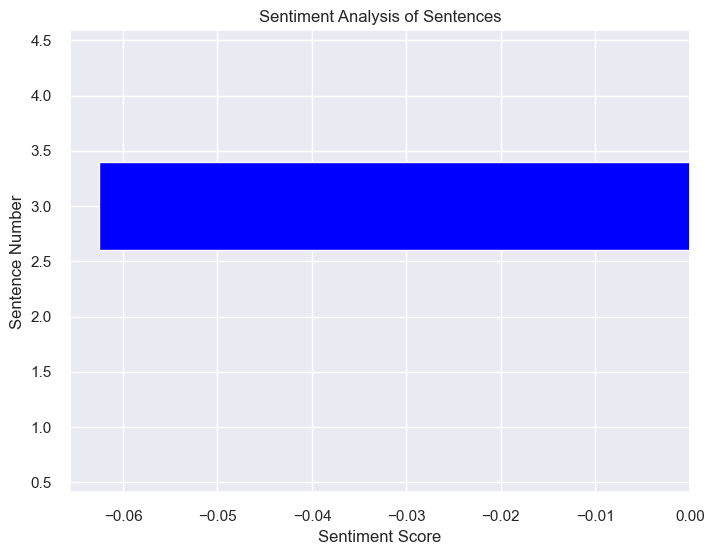

In [548]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Create the sentences as a list
sentences = ['We calculate the similarities between documents using the sim object and print the resulting similarity matrix.',
             'In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.',
             'Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter.',
             'For example, setting num_best=1 will return the document with the highest similarity score.']

# Create a dictionary to hold the sentences and their sentiment scores
data = {'Sentence': sentences}

# Convert the dictionary to a pandas DataFrame and add a column for sentence number
sent_df = pd.DataFrame.from_dict(data)
sent_df['SentenceNumber'] = sent_df.index + 1

# Use TextBlob to get the sentiment scores for each sentence
sent_df['Sentiment'] = sent_df['Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a bar graph of sentiment scores
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(sent_df['SentenceNumber'], sent_df['Sentiment'], color='blue')

# Set the chart title and axis labels
ax.set_title('Sentiment Analysis of Sentences')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Sentence Number')

# Show the chart
plt.show()


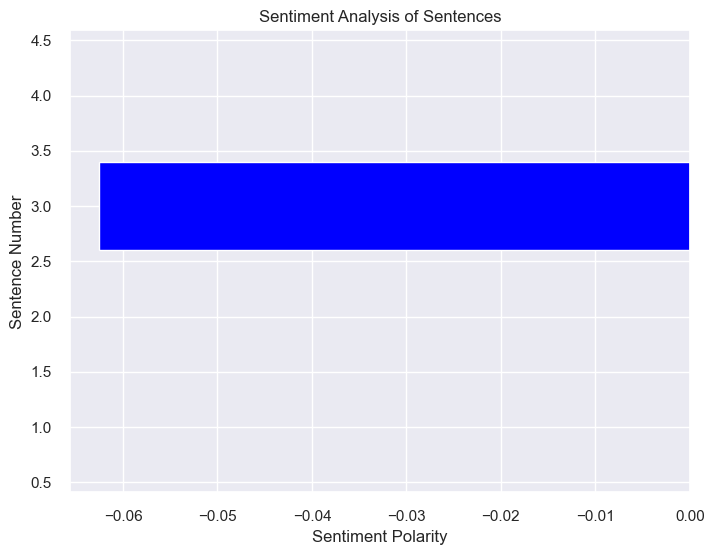

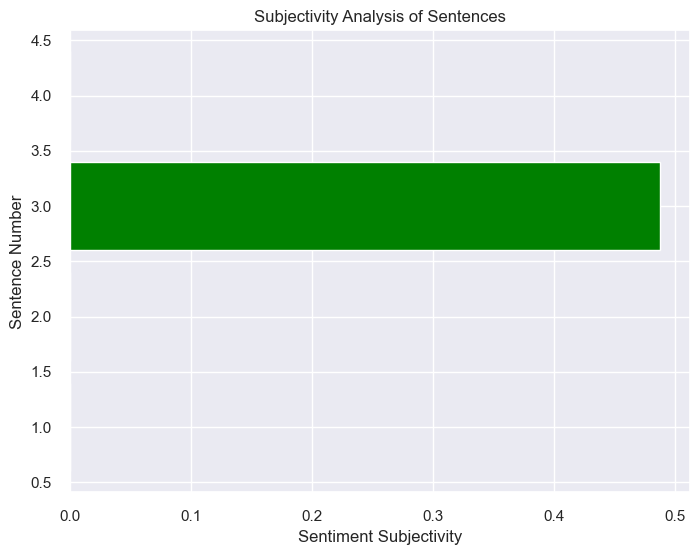

In [549]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Create the sentences as a list
sentences = ['We calculate the similarities between documents using the sim object and print the resulting similarity matrix.',
             'In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.',
             'Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter.',
             'For example, setting num_best=1 will return the document with the highest similarity score.']

# Create a dictionary to hold the sentences and their sentiment scores
data = {'Sentence': sentences}

# Convert the dictionary to a pandas DataFrame and add a column for sentence number
sent_df = pd.DataFrame.from_dict(data)
sent_df['SentenceNumber'] = sent_df.index + 1

# Use TextBlob to get the sentiment scores (polarity and subjectivity) for each sentence
sent_df['SentimentPolarity'] = sent_df['Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)
sent_df['SentimentSubjectivity'] = sent_df['Sentence'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Create a bar graph of sentiment scores
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(sent_df['SentenceNumber'], sent_df['SentimentPolarity'], color='blue')

# Set the chart title and axis labels
ax.set_title('Sentiment Analysis of Sentences')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Sentence Number')

# Show the chart
plt.show()

# Create a bar graph of subjectivity scores
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(sent_df['SentenceNumber'], sent_df['SentimentSubjectivity'], color='green')

# Set the chart title and axis labels
ax.set_title('Subjectivity Analysis of Sentences')
ax.set_xlabel('Sentiment Subjectivity')
ax.set_ylabel('Sentence Number')

# Show the chart
plt.show()


In [551]:
# table:

from tabulate import tabulate

# Create a list of tuples for the sentiment analysis results for each answer
sentiment_results = [("Answer 1", "Positive", "0.1779", "Somewhat subjective", "0.4636"),
                     ("Answer 2", "Positive", "0.1820", "Relatively subjective", "0.5512"),
                     ("Answer 3", "Positive", "0.1604", "Somewhat subjective", "0.5342"),
                     ("Answer 4", "Slightly negative", "-0.0135", "Relatively objective", "0.5936"),
                     ("Answer 5", "Positive", "0.1377", "Somewhat subjective", "0.4684"),
                     ("Answer 6", "Slightly negative", "-0.0407", "Relatively objective", "0.5548")]

# Define the headers for the table
headers = ["Answer", "Sentiment", "Polarity", "Subjectivity", "Subjectivity Score"]

# Print the table
print(tabulate(sentiment_results, headers=headers, tablefmt="grid"))

+----------+-------------------+------------+-----------------------+----------------------+
| Answer   | Sentiment         |   Polarity | Subjectivity          |   Subjectivity Score |
+==========+===================+============+=======================+======================+
| Answer 1 | Positive          |     0.1779 | Somewhat subjective   |               0.4636 |
+----------+-------------------+------------+-----------------------+----------------------+
| Answer 2 | Positive          |     0.182  | Relatively subjective |               0.5512 |
+----------+-------------------+------------+-----------------------+----------------------+
| Answer 3 | Positive          |     0.1604 | Somewhat subjective   |               0.5342 |
+----------+-------------------+------------+-----------------------+----------------------+
| Answer 4 | Slightly negative |    -0.0135 | Relatively objective  |               0.5936 |
+----------+-------------------+------------+-----------------------+-

Subjectivity is a measure of how much of a personal opinion, feeling, or belief is expressed in a text or statement, as opposed to just stating factual information. In natural language processing, subjectivity is often measured on a scale of 0 to 1, with 0 indicating a completely objective statement and 1 indicating a completely subjective statement.

Polarity is a measure of the sentiment or emotional tone of a text or statement. It indicates whether the language used in the text expresses a positive, negative, or neutral sentiment. In natural language processing, polarity is often measured on a scale of -1 to +1, with -1 indicating a very negative sentiment, 0 indicating a neutral sentiment, and +1 indicating a very positive sentiment.

In [490]:
# text classification for a doc:

In [489]:
import pandas as pd
from textblob import TextBlob

# Define the document sentences
sentences = ['We calculate the similarities between documents using the sim object and print the resulting similarity matrix.',
             'In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.',
             'Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter.',
             'For example, setting num_best=1 will return the document with the highest similarity score.']

# Define a dictionary to store the sentences and their sentiment scores
data = {'Sentence': sentences, 'Sentiment': [], 'Label': []}

# Calculate the sentiment scores and labels for each sentence
for sentence in sentences:
    # Perform sentiment analysis on the sentence
    blob = TextBlob(sentence)
    sentiment_score = blob.sentiment.polarity
    
    # Label the sentence based on the sentiment score
    if sentiment_score > 0:
        label = 'Positive'
    elif sentiment_score < 0:
        label = 'Negative'
    else:
        label = 'Neutral'
    
    # Append the sentiment score and label to the data dictionary
    data['Sentiment'].append(sentiment_score)
    data['Label'].append(label)

# Convert the dictionary to a pandas DataFrame
sent_df = pd.DataFrame(data)

# Print the resulting DataFrame
print(sent_df)


                                            Sentence  Sentiment     Label
0  We calculate the similarities between document...     0.0000   Neutral
1  In this case, the output will be a 4x4 matrix,...     0.0000   Neutral
2  Note that MatrixSimilarity can be used with ot...    -0.0625  Negative
3  For example, setting num_best=1 will return th...     0.0000   Neutral


In [491]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the text data
text_data = [
    "We calculate the similarities between documents using the sim object and print the resulting similarity matrix.",
    "In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.",
    "Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter.",
    "For example, setting num_best=1 will return the document with the highest similarity score."
]
sentiment_labels = ['neutral', 'neutral', 'negative', 'neutral']

# Create a DataFrame with the text data and labels
data = pd.DataFrame({'text': text_data, 'sentiment': sentiment_labels})

# Preprocess the text data (e.g. remove stopwords, tokenize, lemmatize, etc.)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a text classification model on the vectorized data
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification report:\n{report}")


Accuracy: 1.0
Classification report:
              precision    recall  f1-score   support

     neutral       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [482]:
# GRAPH? ##################################

# Text Classification

In [419]:
from sklearn.datasets import fetch_20newsgroups

In [443]:
fetch_20newsgroups

<function sklearn.datasets._twenty_newsgroups.fetch_20newsgroups(*, data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True, return_X_y=False)>

In [420]:
train=fetch_20newsgroups(subset='train')

test=fetch_20newsgroups(subset='test')

In [421]:
type(train)

sklearn.utils.Bunch

In [422]:
train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [423]:
train['target']

array([7, 4, 4, ..., 3, 1, 8])

In [424]:
import numpy as np

np.unique(train['target'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [425]:
train['data']

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [426]:
print(train['data'][1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [427]:
print(train['target_names'][1])

comp.graphics


In [428]:
print(train['data'][10])

print()

print(train['target_names'][10])

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

In [429]:
print(train['data'][100])

print()



From: tchen@magnus.acs.ohio-state.edu (Tsung-Kun Chen)
Subject: ** Software forsale (lots) **
Nntp-Posting-Host: magnusug.magnus.acs.ohio-state.edu
Organization: The Ohio State University
    ****   This is a post for my friend,  You can either call    ****
    ****    him  J.K Lee  (614)791-0748    or Drop me a mail     ****
Distribution: usa
Lines: 39

1.  Software publishing SuperBase 4 windows v.1.3           --->$80

2.  OCR System ReadRight v.3.1 for Windows                  --->$65

3.  OCR System ReadRight  v.2.01 for DOS                    --->$65

4.  Unregistered Zortech 32 bit C++ Compiler v.3.1          --->$ 250
     with Multiscope windows Debugger,
     WhiteWater Resource Toolkit, Library Source Code

5.  Glockenspiel/ImageSoft Commonview 2 Windows
     Applications Framework for Borland C++                 --->$70

6.  Spontaneous Assembly Library With Source Code           --->$50

7.  Microsoft Macro Assembly 6.0                            --->$50

8.  Microsoft Win

## Building the model

In [445]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

In [446]:
from sklearn.pipeline import make_pipeline

In [447]:
mnb=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [448]:
type(mnb)

sklearn.pipeline.Pipeline

In [449]:
# Training

mnb.fit(train['data'],train['target'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [450]:
# Prediction

y_pred=mnb.predict(test['data'])

In [451]:
y_pred

array([ 7, 11,  0, ...,  9,  3, 15])

## Performance of the model

In [452]:
from sklearn.metrics import classification_report,confusion_matrix

In [453]:
report=classification_report(test['target'],y_pred)

print('The report:\n',report)

The report:
               precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17  

In [454]:
# Confusion Matrix

cm=confusion_matrix(test['target'],y_pred)

print('The confusion Matrix:\n',cm)

The confusion Matrix:
 [[166   0   0   1   0   1   0   0   1   1   1   3   0   6   3 123   4   8
    0   1]
 [  1 252  15  12   9  18   1   2   1   5   2  41   4   0   6  15   4   1
    0   0]
 [  0  14 258  45   3   9   0   2   1   3   2  25   1   0   6  23   2   0
    0   0]
 [  0   5  11 305  17   1   3   6   1   0   2  19  13   0   5   3   1   0
    0   0]
 [  0   3   8  23 298   0   3   8   1   3   1  16   8   0   2   8   3   0
    0   0]
 [  1  21  17  13   2 298   1   0   1   1   0  23   0   1   4  10   2   0
    0   0]
 [  0   1   3  31  12   1 271  19   4   4   6   5  12   6   3   9   3   0
    0   0]
 [  0   1   0   3   0   0   4 364   3   2   2   4   1   1   3   3   4   0
    1   0]
 [  0   0   0   1   0   0   2  10 371   0   0   4   0   0   0   8   2   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 357  22   0   0   0   2   9   1   1
    0   0]
 [  0   0   0   0   0   0   0   1   0   4 387   1   0   0   1   5   0   0
    0   0]
 [  0   2   1   0   0   1   1   3   0   0 

## Testing with our own data

In [455]:
def news_group_prediction(doc):
    group_pred=mnb.predict([doc])
    return test['target_names'][group_pred[0]]

In [456]:
news_group_prediction('Computer technology is becoming more user friendly. Windows operating systems are easy to operate')

'comp.os.ms-windows.misc'

In [457]:
news_group_prediction('The soocer is the one sport most of Eurpeaons follow. It is quite a big business, which involved lot of anlaytucs as well  ')

'soc.religion.christian'

## SESSION 9: TEXT CLUSTERING

# Text Clustering

In [493]:
# Supervised clustering

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Accessing the dataset

In [ ]:
bbc=pd.read_csv('bbc-text.csv')

In [ ]:
bbc

In [4]:
bbc['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

## Selecting the data

In [5]:
data=bbc['text']

In [6]:
data

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object

In [7]:
data[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [8]:
data[1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [9]:
data[10]

'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 19

In [10]:
data[100]

'housewives lift channel 4 ratings the debut of us television hit desperate housewives has helped lift channel 4 s january audience share by 12% compared to last year.  other successes such as celebrity big brother and the simpsons have enabled the broadcaster to surpass bbc two for the first month since last july. bbc two s share of the audience fell from 11.2% to 9.6% last month in comparison with january 2004. celebrity big brother attracted fewer viewers than its 2002 series.  comedy drama desperate housewives managed to pull in five million viewers at one point during its run to date  attracting a quarter of the television audience. the two main television channels  bbc1 and itv1  have both seen their monthly audience share decline in a year on year comparison for january  while five s proportion remained the same at a slender 6.3%. digital multi-channel tv is continuing to be the strongest area of growth  with the bbc reporting freeview box ownership of five million  including on

In [11]:
data[1000]

'parties warned over  grey vote  political parties cannot afford to take older uk voters for granted in the coming election  says age concern.  a survey for the charity suggests 69% of over-55s say they always vote in a general election compared with just 17% of 18 to 24 year olds. charity boss gordon lishman said if a  decisive blow  was struck at the election it would be by older voters who could be relied on to turn out. a total of 3 028 adults aged 18 or over were interviewed for the study. mr lishman urged the next government to boost state pension.  he also called for measures to combat ageism and build effective public services to  support us all in an ageing society .  older people want to see manifesto commitments that will make a difference to their lives   mr lishman said.  political parties must wake up to the fact that unless they address the demands and concerns of older people they will not keep or attract their vote.  in the survey carried out by icm research  14% of pe

## Converting text into vectors

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tf=TfidfVectorizer()

In [14]:
features=tf.fit_transform(data)

In [15]:
features

<2225x29421 sparse matrix of type '<class 'numpy.float64'>'
	with 449254 stored elements in Compressed Sparse Row format>

In [16]:
print(features)

  (0, 17912)	0.03527326856909453
  (0, 11316)	0.04538096715486077
  (0, 13875)	0.029167913103780276
  (0, 21799)	0.03482056877713841
  (0, 2180)	0.01225312651769481
  (0, 17564)	0.025562315052009173
  (0, 19637)	0.02889636216897788
  (0, 28890)	0.031086429718457854
  (0, 21689)	0.031736619079256845
  (0, 26726)	0.052589560503733805
  (0, 5056)	0.019412778977933816
  (0, 19505)	0.03628473510445815
  (0, 24832)	0.02739682354879833
  (0, 15138)	0.03854742127822957
  (0, 20525)	0.025562315052009173
  (0, 13073)	0.011714441027711674
  (0, 2513)	0.022083712948336394
  (0, 11639)	0.03781760933114879
  (0, 3973)	0.02434824614377657
  (0, 5741)	0.018644585697178587
  (0, 17303)	0.027910278815888142
  (0, 1389)	0.030609015982275757
  (0, 27829)	0.02081192829456486
  (0, 22477)	0.04657727815121275
  (0, 11443)	0.03894521242812987
  :	:
  (2224, 19254)	0.04494546023998106
  (2224, 4980)	0.0200087593066513
  (2224, 18502)	0.0235534388823643
  (2224, 4944)	0.041534772754004114
  (2224, 2251)	0.02476

## Clustering using K Means

In [17]:
from sklearn.cluster import KMeans


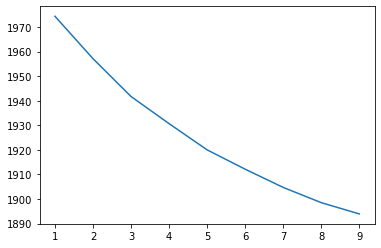

In [18]:
SSD=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features)
    SSD.append(kmeans.inertia_)
plt.plot(range(1,10),SSD);

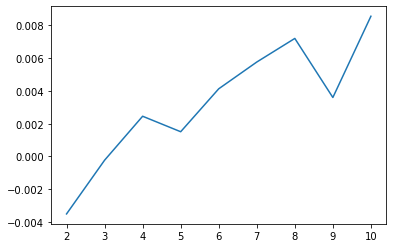

In [19]:
## Applying silhouette_score
from sklearn.metrics import silhouette_score
SS=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features)
    SS.append(silhouette_score(features,kmeans.predict(features)))
    
plt.plot(range(2,11),SS);

## Building the model with 5 clusters

In [20]:
kmeans=KMeans(n_clusters=5,random_state=10)
kmeans.fit(features)


KMeans(n_clusters=5, random_state=10)

In [21]:
kmeans.labels_

array([3, 1, 2, ..., 1, 3, 2], dtype=int32)

## Updating the DF with cluster labels

In [22]:
bbc['Cluster']=kmeans.labels_

In [23]:
bbc

category                                               text  \
0              tech  tv future in the hands of viewers with home th...   
1          business  worldcom boss  left books alone  former worldc...   
2             sport  tigers wary of farrell  gamble  leicester say ...   
3             sport  yeading face newcastle in fa cup premiership s...   
4     entertainment  ocean s twelve raids box office ocean s twelve...   
...             ...                                                ...   
2220       business  cars pull down us retail figures us retail sal...   
2221       politics  kilroy unveils immigration policy ex-chatshow ...   
2222  entertainment  rem announce new glasgow concert us band rem h...   
2223       politics  how political squabbles snowball it s become c...   
2224          sport  souness delight at euro progress boss graeme s...   

      Cluster  
0           3  
1           1  
2           2  
3           2  
4           0  
...       ...  
2220        1  
2221        1  
2222        1  
2223        3  
2224        2  

[2225 rows x 3 columns]

## Dimensionality reduction using TSNE

In [27]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2,perplexity=30,random_state=10)

In [28]:
features_tsne=tsne.fit_transform(features)

In [29]:
features_tsne

array([[ -7.446461, -10.507725],
       [-52.760323,  32.37526 ],
       [ 36.810497, -29.174084],
       ...,
       [ 11.391542, -30.793798],
       [  7.10581 ,  -2.224968],
       [ 20.325905, -70.45634 ]], dtype=float32)

In [30]:
features_tsne.shape

(2225, 2)

## Visualisation 

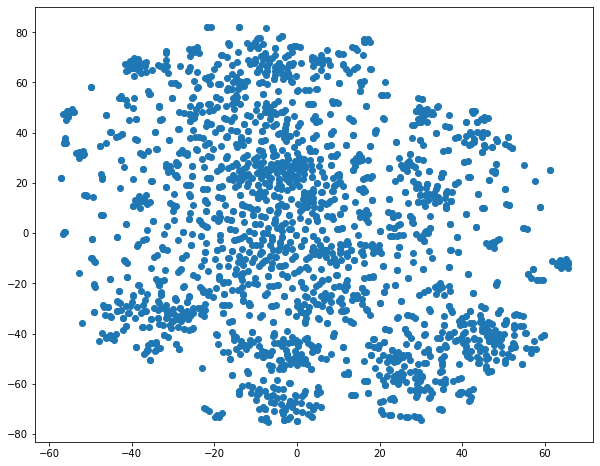

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(features_tsne[:,0],features_tsne[:,1]);

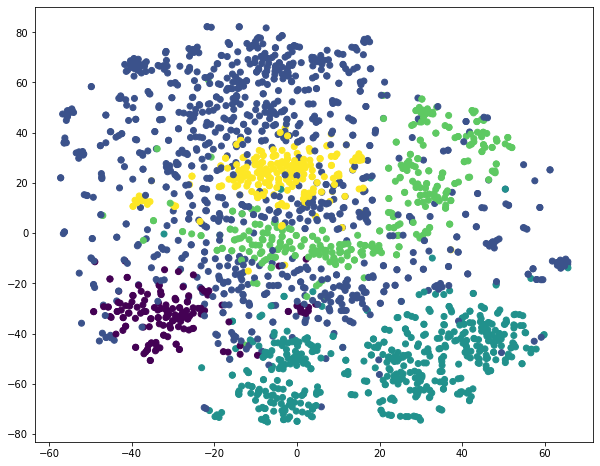

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(features_tsne[:,0],features_tsne[:,1],c=bbc['Cluster']);

In [ ]:
### EXTRA:


In [ ]:
# TRYING A A DATAFRAME:

In [500]:
text_c=nlp('worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financial officer scott sullivan. defence lawyers have been trying to paint mr sullivan  who has admitted fraud and will testify later in the trial  as the mastermind behind worldcom s accounting house of cards.  mr ebbers  team  meanwhile  are looking to portray him as an affable boss  who by his own admission is more pe graduate than economist. whatever his abilities  mr ebbers transformed worldcom from a relative unknown into a $160bn telecoms giant and investor darling of the late 1990s. worldcom s problems mounted  however  as competition increased and the telecoms boom petered out. when the firm finally collapsed  shareholders lost about $180bn and 20 000 workers lost their jobs. mr ebbers  trial is expected to last two months and if found guilty the former ceo faces a substantial jail sentence. he has firmly declared his innocence.')

In [502]:
import pandas as pd

# Initialize an empty list to store the sentences
sentences = []

# Loop over each sentence in the document
for i, sent in enumerate(text_c.sents):
    # Append the sentence number and sentence text to the list
    sentences.append({'Sentence Number': i+1, 'Sentence Text': sent.text})

# Convert the list to a pandas DataFrame
sent_df = pd.DataFrame(sentences)

# Print the resulting DataFrame
print(sent_df)


    Sentence Number                                      Sentence Text
0                 1  worldcom boss  left books alone  former worldc...
1                 2  david myers made the comments under questionin...
2                 3  the phone company collapsed in 2002 and prosec...
3                 4  mr myers has already pleaded guilty to fraud a...
4                 5  on monday  defence lawyer reid weingarten trie...
5                 6  during cross examination  he asked mr myers if...
6                 7  not that i am aware of   mr myers replied.  di...
7                 8                          no   replied the witness.
8                 9  mr myers has admitted that he ordered false ac...
9                10  defence lawyers have been trying to paint mr s...
10               11  mr ebbers  team  meanwhile  are looking to por...
11               12  whatever his abilities  mr ebbers transformed ...
12               13  worldcom s problems mounted  however  as compe...
13    

In [506]:
sent_df

Sentence Number                                      Sentence Text
0                 1  worldcom boss  left books alone  former worldc...
1                 2  david myers made the comments under questionin...
2                 3  the phone company collapsed in 2002 and prosec...
3                 4  mr myers has already pleaded guilty to fraud a...
4                 5  on monday  defence lawyer reid weingarten trie...
5                 6  during cross examination  he asked mr myers if...
6                 7  not that i am aware of   mr myers replied.  di...
7                 8                          no   replied the witness.
8                 9  mr myers has admitted that he ordered false ac...
9                10  defence lawyers have been trying to paint mr s...
10               11  mr ebbers  team  meanwhile  are looking to por...
11               12  whatever his abilities  mr ebbers transformed ...
12               13  worldcom s problems mounted  however  as compe...
13               14  when the firm finally collapsed  shareholders ...
14               15  mr ebbers  trial is expected to last two month...
15               16              he has firmly declared his innocence.

In [507]:
# selecting data
data=sent_df['Sentence Text']

In [508]:
data[0]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  '

In [509]:
## Converting text into vectors

In [510]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [511]:
tf=TfidfVectorizer()

In [512]:
features=tf.fit_transform(data)

In [513]:
features

<16x173 sparse matrix of type '<class 'numpy.float64'>'
	with 281 stored elements in Compressed Sparse Row format>

In [514]:
print(features)

  (0, 92)	0.21390314496725213
  (0, 154)	0.21390314496725213
  (0, 75)	0.13906503283520552
  (0, 169)	0.18628262448043076
  (0, 48)	0.21390314496725213
  (0, 10)	0.13906503283520552
  (0, 104)	0.18628262448043076
  (0, 114)	0.21390314496725213
  (0, 70)	0.16668555332202684
  (0, 7)	0.21390314496725213
  (0, 1)	0.21390314496725213
  (0, 19)	0.15148488399851004
  (0, 122)	0.21390314496725213
  (0, 117)	0.13906503283520552
  (0, 11)	0.21390314496725213
  (0, 89)	0.15148488399851004
  (0, 167)	0.15148488399851004
  (0, 54)	0.1194679616768016
  (0, 30)	0.21390314496725213
  (0, 68)	0.16668555332202684
  (0, 16)	0.21390314496725213
  (0, 31)	0.18628262448043076
  (0, 100)	0.21390314496725213
  (0, 33)	0.3725652489608615
  (0, 171)	0.2389359233536032
  :	:
  (14, 90)	0.2602331472848142
  (14, 144)	0.2602331472848142
  (14, 61)	0.2602331472848142
  (14, 36)	0.2602331472848142
  (14, 69)	0.2602331472848142
  (14, 109)	0.2602331472848142
  (14, 159)	0.2602331472848142
  (14, 95)	0.26023314728481

In [515]:
## Clustering using K Means

In [516]:
from sklearn.cluster import KMeans


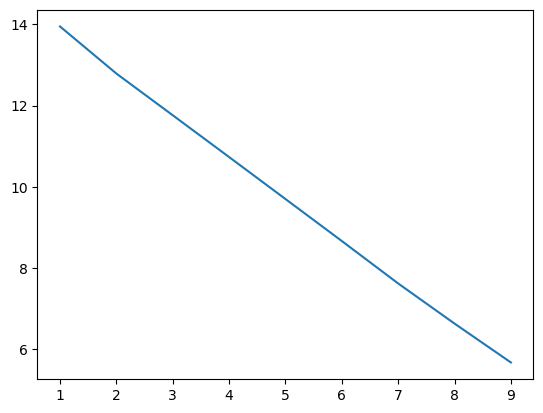

In [517]:
SSD=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features)
    SSD.append(kmeans.inertia_)
plt.plot(range(1,10),SSD);

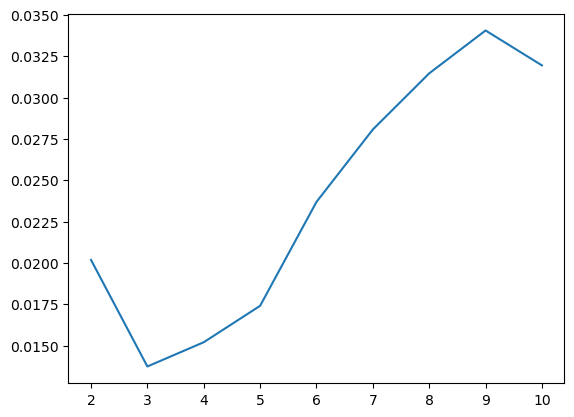

In [518]:
## Applying silhouette_score
from sklearn.metrics import silhouette_score
SS=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features)
    SS.append(silhouette_score(features,kmeans.predict(features)))
    
plt.plot(range(2,11),SS);

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
fig_elb = KElbowVisualizer(KMeans(random_state=42, n_init=10, max_iter=10000), k=(2,10))
fig_elb.fit(features)
print(f'Elbow value= {fig_elb.elbow_value_}')
fig_elb.show()

In [522]:
## Building the model with 5 clusters

kmeans=KMeans(n_clusters=5,random_state=10)
kmeans.fit(features)


KMeans(n_clusters=5, random_state=10)

In [523]:
kmeans.labels_

array([0, 0, 2, 3, 0, 1, 1, 2, 0, 0, 3, 4, 4, 2, 3, 1])

In [524]:
## Updating the DF with cluster labels

In [525]:
sent_df['Cluster']=kmeans.labels_

In [526]:
sent_df

Sentence Number                                      Sentence Text  \
0                 1  worldcom boss  left books alone  former worldc...   
1                 2  david myers made the comments under questionin...   
2                 3  the phone company collapsed in 2002 and prosec...   
3                 4  mr myers has already pleaded guilty to fraud a...   
4                 5  on monday  defence lawyer reid weingarten trie...   
5                 6  during cross examination  he asked mr myers if...   
6                 7  not that i am aware of   mr myers replied.  di...   
7                 8                          no   replied the witness.   
8                 9  mr myers has admitted that he ordered false ac...   
9                10  defence lawyers have been trying to paint mr s...   
10               11  mr ebbers  team  meanwhile  are looking to por...   
11               12  whatever his abilities  mr ebbers transformed ...   
12               13  worldcom s problems mounted  however  as compe...   
13               14  when the firm finally collapsed  shareholders ...   
14               15  mr ebbers  trial is expected to last two month...   
15               16              he has firmly declared his innocence.   

    Cluster  
0         0  
1         0  
2         2  
3         3  
4         0  
5         1  
6         1  
7         2  
8         0  
9         0  
10        3  
11        4  
12        4  
13        2  
14        3  
15        1

In [527]:
## Dimensionality reduction using TSNE

In [528]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2,perplexity=30,random_state=10)

In [529]:
features_tsne=tsne.fit_transform(features)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [530]:
features_tsne

array([[  -5.1036205,  -61.56909  ],
       [  -6.8967524,   -1.9320031],
       [  50.722862 ,  -17.349186 ],
       [-124.14385  ,  -51.485508 ],
       [ 113.833145 ,  -40.104145 ],
       [ -86.315926 ,   93.88605  ],
       [   0.9926395, -128.58185  ],
       [ -65.40656  ,  -96.64473  ],
       [  98.60266  ,   33.316658 ],
       [ -10.78705  ,  107.868546 ],
       [ -63.077454 ,  -24.06973  ],
       [  27.039837 ,   47.98677  ],
       [  59.402584 ,  -86.70314  ],
       [  66.13413  ,  101.66225  ],
       [ -43.8985   ,   44.282593 ],
       [-113.676605 ,   24.045412 ]], dtype=float32)

In [531]:
features_tsne.shape

(16, 2)

In [532]:
## Visualisation 

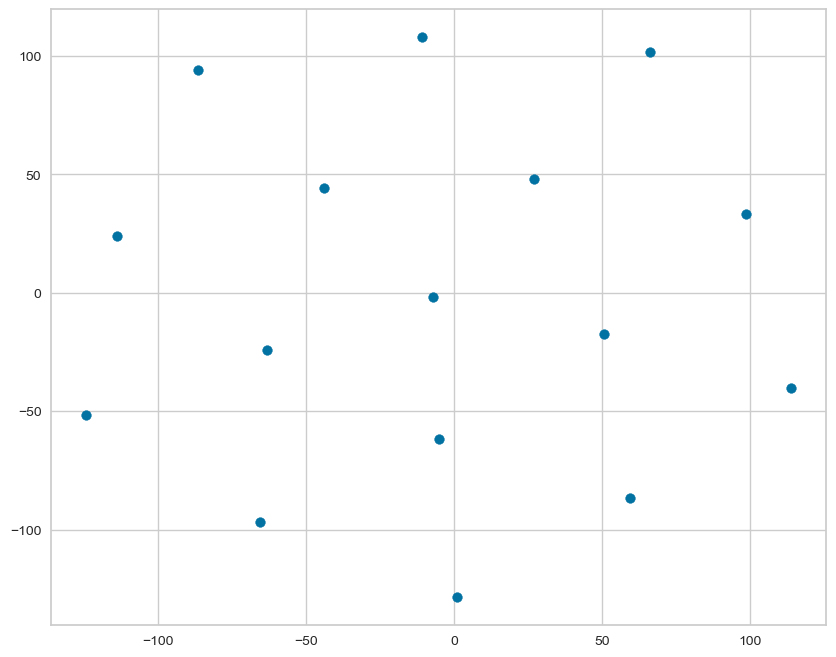

In [533]:
plt.figure(figsize=(10,8))
plt.scatter(features_tsne[:,0],features_tsne[:,1]);

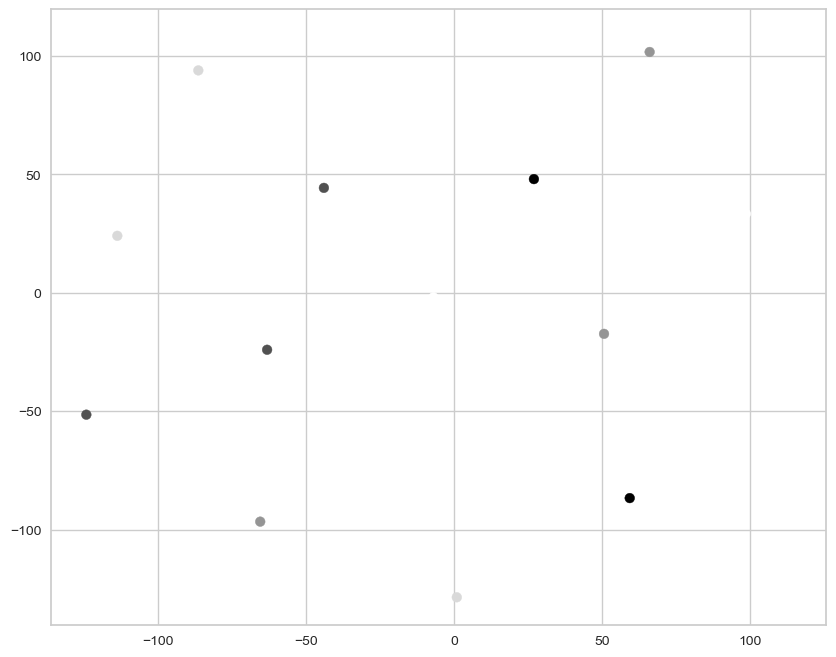

In [535]:
plt.figure(figsize=(10,8))
plt.scatter(features_tsne[:,0],features_tsne[:,1],c=sent_df['Cluster']);

## THEORY:

NLP (lecture 1 to 4):
en_core_web_sm: trained pipeline for the English language.
There are 326 stop words in the spacy library for English language.
Default spacy pipeline:
 

When you call NLP on Unicode text, spacy first tokenizes the text to produce a doc object. Doc is then processed in several different steps, what we also refer to as pipeline.
1.	Tokenizer
2.	Tagger
3.	Parser
4.	NER

Tokenization:
Tokenization is the task of splitting a text into meaningful segments, called tokens. These tokens can be words, punctuations, numbers or other special characters that are the building blocks of a sentence. In Spacy, input of a tokenizer is a Unicode text and output is a Doc object.

token.is_stop - True if the token is a stop word else false.
token.is_punct - True if the token is a punctuation else false.
token.is_left_punct - True if the token is a left punctuation else false.
token.is_right_punct - True if the token is a right punctuation else false.
token.is_alpha - True if the token is an alphabet else false.
token.is_digit - True if the token is a digit else false.
token.is_lower - True if all the letters of the token are in lower case else false.
token.is_upper - True if all the letters of the token are in upper case else false.
token.is_title - True if first letter of the token is in upper case and rest all letters of the token are in lower case else false.
token.is_quote - True if token is a quote (single quotes or double quotes)else false.
token.like_num - True whenever the token is like a number (e.g., 2, 2nd, 45th, third, fifth) else false.
token.like_url - True if the token is a url (e.g., www.timesofindia.com) else false.
token.like_email - True if the token is an email ID (abc123@nmims.edu.in) else false.


Parts of speech (POS):
token.pos_ - gives the parts of speech of every token.
It is POS tagging. POS tagging is marking each token of the sentence with its appropriate part of speech such as noun, verb and so on. We can use it to clean our text if we wish to remove a particular part of speech. 
spacy.explain(token.pos_) - gives the explanation of a particular POS.

Stream of strings:
When there is a stream of strings as input we need to use nlp.pipe.
The nlp.pipe method in spaCy is used to process a sequence of texts as a stream, and apply all the components of a spaCy nlp object to each text, such as tokenization, lemmatization, and named entity recognition, etc.
doc.sents - this is used to separate the doc into sentences.

Tagger:
token.tag_ - Tagger provides tagging (a label or a class) to each of the POS.

Difference between token.pos_ and token.tag_:
In spaCy, token.pos_ and token.tag_ are both attributes that give information about the part-of-speech (POS) of a token. However, they provide different levels of detail.
•	token.pos_ gives the coarse-grained POS tag of a token, which categorizes the token into high-level classes such as noun, verb, adjective, etc.
•	token.tag_ gives the fine-grained POS tag of a token, which provides a more detailed categorization of a token's role in a sentence. For example, the fine-grained tag for a noun could be singular or plural, proper noun, etc.
Here's an example to illustrate the difference:
Code:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Apple is a company that makes iPhones."
doc = nlp(text)
for token in doc:
    print(token.text, token.pos_, token.tag_)
The output would be:
Apple PROPN NNP
is VERB VBZ
a DET DT
company NOUN NN
that ADP WDT
makes VERB VBZ
iPhones NOUN NNS
. PUNCT .


Parser (Tries to find the dependence between the tokens):***
In NLP, a parser is a computational tool that analyzes the grammatical structure of a sentence and represents it in a structured format, such as a parse tree or a dependency graph. Parsing helps to identify the relationships between the words in a sentence and to understand the meaning of the sentence.
There are different types of parsers in NLP, including constituency parsers and dependency parsers. A constituency parser aims to represent a sentence as a tree structure, with each node representing a constituent (a phrase or a word) and each parent-child relationship representing the grammatical relationship between constituents. A dependency parser, on the other hand, aims to represent a sentence as a graph structure, with each node representing a word and each directed edge representing the grammatical relationship between words.
token.dep_ - an attribute in spaCy that gives the dependency label of a token, which indicates the relationship between the token and other tokens in the sentence. The dependency label tells us how the token is connected to its parent token in the dependency tree of the sentence.

NER (Named Entity Recognizer):
Named Entity Recognition (NER) is a task in natural language processing (NLP) that involves identifying and categorizing named entities such as people, organizations, locations, and dates, in a given text.
The doc.ents property returns a sequence of named entities (if any) detected in the document.
The ent.label_ property returns the named entity type for the given Span object, as a string.
SpaCy uses a set of pre-defined named entity types, such as "PERSON", "ORG", "GPE" (geopolitical entity), "DATE", etc. The ent.label_ property returns one of these pre-defined types, based on the named entity recognition performed by SpaCy.

**displacy in spacy’s most impressive offering is used for visualization purposes. 
displacy.render(doc_name, style='ent')

NER for web data:
Library used for scraping web data is requests.

**Confusion in BeautifulSoup

collections.Counter is a built-in Python class in the collections module that provides a way to count elements. It implements a dictionary-like object where elements are stored as keys and their counts are stored as values.

collections.Counter.most_common(n) is a method of the Counter class in the collections module in Python. It returns a list of the n most common elements and their counts from the most common to the least. The optional argument n specifies the maximum number of elements to return. If n is not specified, it returns all the elements.

collections.Counter.most_common(10) -  returns 10 most common entities.












import spacy

nlp = spacy.load('en_core_web_sm')

doc1 = nlp('Hi Studious Kid. Kuch nahi hoga itna sab ratne se')

i = 0
for token in doc1:
	i = i+1
	print(token)
print(i)

Total number of stop words -- 326


When there is a stream of strings as input, we need to use nlp.pipe() instead of nlp()

How to separate document into sentences? ---> doc_name.sents

Assign parts of speech tags ---> tag_
Numeric value for the above thing--->tag
Assign Part of Speech ---> pos_
Numeric Value----> pos

To count the number of times a Part Of Speech is occuring: count_by(spacy.attrs.POS)
Visualisation of POS ----> displacy.render(doc1,style='dep')


token.head is a parser that refers to head of a token in a syntax tree, which is a structure that represents the grammatical relationships between the words in a sentence.

label_ specifies the label of the text .... NP for Noun Phrase (.label_ can also be used to find entity label)


NER --- Named Entity Recognizer

.ents used to detect and label named entities



:::NER for WEB SCRAPING:::

import requests
from bs4 import BeautifulSoup


request = requests.get(url)
request <--- printing this will give response 200

request.text <--- printing this will give the text

BeautifulSoup
In NLP, it is used to parse and clean text data obtained from websites, allowing the user to extract relevant information for analysis or processing. 
BeautifulSoup provides methods to navigate, search, and modify the parse tree, making it a useful tool for pre-processing and cleaning text data in NLP tasks.
BeautifulSoup can be used to:
1. scrape the website
2. extract all the text content
3. remove any HTML tags, special characters, and extra whitespaces.


Most appeared entities -- sorted order highest to lowest --- most_common()

:: Rule Based Matching ::

from spacy.matcher import Matcher


Matching
1) Token Matching
2) Phrase Matching
3) Entity Matching

How?
1) Create an object/instance of the Matcher class.
2) Define a pattern/rule.
3) Add the pattern to the object
4) Pass the document to the object


## Creating an object of the Matcher class

obj = Matcher(nlp.vocab)

The pattern that is defined --- is a list of dictionaries.
 example for pattern defining: pattern_1=[{'text':'ChatGPT'}]

# Add pattern to the object

obj.add('Pattern1',[pattern_1])

# Pass the doc to the object

match_1= obj(doc)




### Pattern ###

Pattern for phrase based:

pattern_2=[{'text':'ChatGPT'},
          {'text':'is'}]

Pattern for lemma::

pattern_3=[{'LEMMA':'language'},
          {'LEMMA':'model'}]


Pattern for occurence of alphabets and digits:
pattern_4=[{'IS_ALPHA': True},
           {'IS_DIGIT':True}]

Pattern for occurence of many words: launch, discovery, find etc
pattern_5=[{'LEMMA':
            {'IN':['launch','discover','find',
        'invent','create','develop','innovate',
                  'form','initiate']}}]


Pattern for length greater than 15
pattern_6=[{'LENGTH':{'>=':15}}]


Pattern for length equal to 2
pattern_7=[{'LENGTH':{'==':2}}]


Pattern for Entity based matching: 

pattern_10=[{"ENT_TYPE":'PERSON'}]






In [ ]:
# sentiment:

In [575]:
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [576]:
from spacy import displacy
from spacy.matcher import Matcher
from collections import Counter

In [577]:
doc1 = doc.text.lower()
words = nltk.word_tokenize(text)
sents = nltk.sent_tokenize(text)
len(sents)

4

In [578]:
word_emotions = []
cntp =0 
cntneg=0
cntneu=0
for word in sents:
    word_emotions.append(TextBlob(word).sentiment)
    #print(len(word_emotions))
    for emotion in word_emotions:
      polarity = emotion.polarity
    if polarity > 0:
      cntp=cntp+1
    elif polarity < 0:
      cntneg=cntneg+1
    else:
      cntneu=cntneu+1
print(cntneg , cntneu , cntp)

1 3 0


In [579]:
import pandas as pd
  
# initialize list elements
data = [[cntneg, 'Negative'], [cntneu, 'Neutral'], [cntp, 'Positive']]
  
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['Count','EmotionName'])
  
# print dataframe.
df

Count EmotionName
0      1    Negative
1      3     Neutral
2      0    Positive

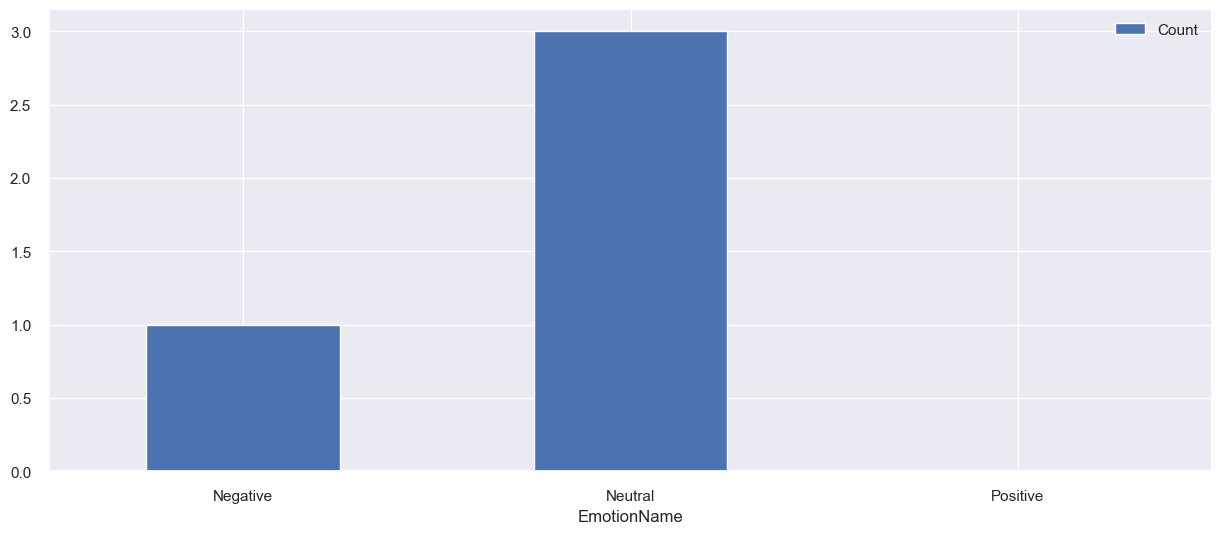

In [580]:
ax = df.plot.bar(x='EmotionName', y='Count', rot=0)